<a href="https://colab.research.google.com/github/RoshanJamthe/Cardiovascular-risk-prediction-classifier/blob/main/history_combined_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>Problem Statement

##Problem statement

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.
## Data Description
####Demographic:
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

####Behavioral
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

####Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

####Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

###Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

![](https://drive.google.com/uc?export=view&id=1OLsUAqrWcyjmgFlGQHHESqHfWpTVjAC9)

#<u><b> Import all the libraries needed for the project</u></b>

In [215]:
"""Getting all the libraries required to run the codes in this notebook"""

############################################################
###         Importing Data Wrangling libraries          ###
############################################################
import pandas as pd  # Pythons most used library for data analysis
import numpy as np   # Pandas + NumPy makes matrix manipulation easier
import matplotlib.pyplot as plt # Plot anything
# To output the plot inline with the code
%matplotlib inline 
import seaborn as sns
sns.set()         # Alias for set_theme(), which is the preferred interface for seaborn plots
from numpy import math

import time       # Import time to record time taken for time consuming steps like crossvalidation
import random     # Import random for imputing random numbers
import warnings
warnings.simplefilter("ignore")                  # Show only output, no warnings

# import variance_inflation_factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor  # To check multicollinearity

!pip install boruta # Install boruta
from boruta import BorutaPy # For feature selection, build on top of random forest 

##############################################################
###         Importing Data preprocessing Libraries         ###
##############################################################
# Import data preprocessors
from sklearn.preprocessing import MinMaxScaler # Normalizer
from sklearn.preprocessing import StandardScaler # Stardardizer

# Split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

##############################################################
###              Machine Learning Algorithms               ###
##############################################################
from sklearn.naive_bayes import ComplementNB  # Naive Bayes classifier, complementNB variant: particularly for imbalanced dataset
from sklearn.linear_model import LogisticRegression # Logistic Regression, one of the fastest and widely used classifier for binary classification problems
from sklearn.svm import SVC # Support Vector Machine, one of the most versatile algorithm
from sklearn import ensemble 
from sklearn.ensemble import RandomForestClassifier # Random Forest, a bagging algorithm.
from xgboost import XGBClassifier # XGBoost, a boosting algorithm. Famous for its flexibility and regularization. Recommend to always try it. 
# To get best values of hyperparameters use BayesSearch crossvalidation

!pip install scikit-optimize # Install scikit-optimize
from skopt import BayesSearchCV  

##############################################################
###     Performance metrics for classification problem     ###
##############################################################
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

#############################################################
###                 Model Interpretation                  ###
#############################################################
# Model interpretation, used for black box models like ensembles and neural network models
!pip install shap
import shap

# <b><u>Exploratory Data Analysis


## First look at the data!

### Data loading and viewing

In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [217]:
# Load the dataset
heart_df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project/ML/Cardiovascular risk prediction/data_cardiovascular_risk.csv")

In [218]:
# View the dataset
heart_df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0


> There are object type features they need to be converted into the numerical format. That can be done right away. So, we will do that first using a simple replace command. 






In [219]:
# Encode the features
heart_df = heart_df.replace({'sex':{'F':0,'M':1}, 'is_smoking':{'YES':1,'NO':0}})
heart_df.head()

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0    0           1         3.0     0.0                0   
1   1   36        4.0    1           0         0.0     0.0                0   
2   2   46        1.0    0           1        10.0     0.0                0   
3   3   50        1.0    1           1        20.0     0.0                0   
4   4   64        1.0    0           1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

id and education are straightaway irrelevant features for this study. The heart disease is a strictly biological term. It has nothing to do with education.

In [220]:
# Drop 'id' column, which is insignificant for the analysis
heart_df.drop(['id','education'],axis=1,inplace=True)

> The dependent feature 'TenYearCHD' is in required data type format, but following standard practice let's rename it to 'class' for convenience.

In [221]:
# Rename 'TenYearCHD' to 'class'. It's a standard practice to do so
heart_df= heart_df.rename(columns={'TenYearCHD':'class'})

In [222]:
# It is good practice to track the changes, to avoid mistakes.
heart_df.head()

age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   64    0           1         3.0     0.0                0             0   
1   36    1           0         0.0     0.0                0             1   
2   46    0           1        10.0     0.0                0             0   
3   50    1           1        20.0     0.0                0             1   
4   64    0           1        30.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  class  
0         0    221.0  148.0   85.0    NaN       90.0     80.0      1  
1         0    212.0  168.0   98.0  29.77       72.0     75.0      0  
2         0    250.0  116.0   71.0  20.35       88.0     94.0      0  
3         0    233.0  158.0   88.0  28.26       68.0     94.0      1  
4         0    241.0  136.5   85.0  26.42       70.0     77.0      0

Make the data copy and analyze the data...

In [223]:
# Before proceeding forward, let's make a copy of the dataset.
df = heart_df.copy()

In [224]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   int64  
 2   is_smoking       3390 non-null   int64  
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  class            3390 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 397.4 KB




> Data has some null values.



In [225]:
# Describe the features
df.describe()

age          sex   is_smoking   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3390.000000  3368.000000  3346.000000   
mean     49.542183     0.432743     0.497640     9.069477     0.029886   
std       8.592878     0.495529     0.500068    11.879078     0.170299   
min      32.000000     0.000000     0.000000     0.000000     0.000000   
25%      42.000000     0.000000     0.000000     0.000000     0.000000   
50%      49.000000     0.000000     0.000000     0.000000     0.000000   
75%      56.000000     1.000000     1.000000    20.000000     0.000000   
max      70.000000     1.000000     1.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose        class  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [226]:
# Check out number of unique entries in each column
df.nunique()

age                  39
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
class                 2
dtype: int64

In [227]:
# Get unique values from each feature
def unique_values(df):
  for col in df.columns:
    print(f'{col} : {df[col].unique()}')
    print("-*-"*30)

# Check out the unique values
unique_values(df)    

age : [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
sex : [0 1]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
is_smoking : [1 0]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
cigsPerDay : [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
BPMeds : [ 0. nan  1.]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
prevalentStroke : [0 1]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
prevalentHyp : [0 1]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

* There is no mismatched data 

In [228]:
# Check for duplicate rows
df.duplicated().sum()

0



> The dataset has 0 duplicate rows




In [229]:
# Get class balance
for col in df.columns:
  if df[col].nunique()<20:
    print('---'*10)
    print('  '*5+col+'  '*5)
    print('---'*10)
    print(f'Distribution of {col}')
    print(df[col].value_counts())
    print(f'Distribution of Dependent variable to know value count when class=1')
    print(df[df[col]==1]['class'].value_counts())
    print(" ")

------------------------------
          sex          
------------------------------
Distribution of sex
0    1923
1    1467
Name: sex, dtype: int64
Distribution of Dependent variable to know value count when class=1
0    1195
1     272
Name: class, dtype: int64
 
------------------------------
          is_smoking          
------------------------------
Distribution of is_smoking
0    1703
1    1687
Name: is_smoking, dtype: int64
Distribution of Dependent variable to know value count when class=1
0    1412
1     275
Name: class, dtype: int64
 
------------------------------
          BPMeds          
------------------------------
Distribution of BPMeds
0.0    3246
1.0     100
Name: BPMeds, dtype: int64
Distribution of Dependent variable to know value count when class=1
0    67
1    33
Name: class, dtype: int64
 
------------------------------
          prevalentStroke          
------------------------------
Distribution of prevalentStroke
0    3368
1      22
Name: prevalentStroke,

## EDA

###Distribution of class

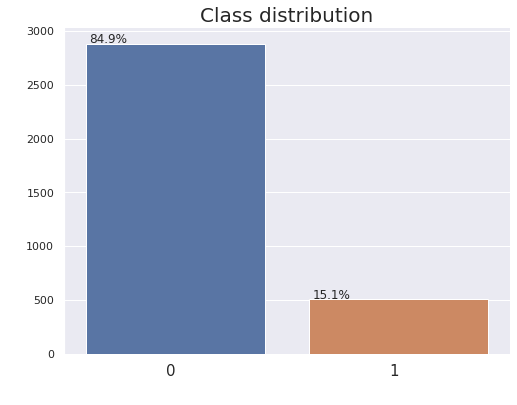

In [230]:
plt.figure(figsize=(8,6))
Y = df["class"]
total = len(Y)*1.
ax=sns.countplot(x="class", data=df)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5),fontsize=12, ha='center')

ax.set_ylabel(" ", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),  ha="right",fontsize=15)
ax.set_xlabel(" ", fontsize=15)
sns.despine(bottom=True,right=True)
# ax.legend(labels=["no","yes"])
ax.set_title('Class distribution',fontsize=20)
plt.show()

In [231]:
# Let's get the actual ratio of imbalance
df['class'].value_counts()

0    2879
1     511
Name: class, dtype: int64

In [232]:
2879/511

5.634050880626223

Given dataset is imbalanced, 5.634:1 (majority:minority).

The dataset is imbalanced towards class 0.

Many algorithms don't work well with imbalanced dataset. We may need to use 'resampling techniques' like 'SMOTE' or use cost-sensitive algorithms.


### Other Independent features

In [233]:
# Build a function to get [box_plot and dist_plot for continuous values feature] and [box_plot and bar_plot for discrete plot]
def get_eda(df,dependent_feature):
  for col in [i for i in df.columns if i!=dependent_feature]:

    # Continuous features
    if len(df[col].unique())>20:
      plt.figure(figsize=(18,6))
      plt.subplot(1, 2, 1)
      fig = sns.boxplot(x=df[dependent_feature], y=df[col])       # Bivariate , Box plot
      fig.set_title(f'{col} box_plot',fontsize=19)
      fig.set_ylabel(col,fontsize=14)

      plt.subplot(1, 2, 2)
      fig1 = sns.distplot(df[df[dependent_feature]==0][col].dropna(),color='purple',label='no')  # Univariate , Dist plot
      fig2 = sns.distplot(df[df[dependent_feature]==1][col].dropna(),color='green',label='yes') 
      plt.ylabel('Frequency',fontsize=14)
      plt.xlabel(col,fontsize=14)
      plt.title(f'{col} Distribution',fontsize=19)
      plt.legend()
      plt.show()

    # Categorical features
    else:
      plt.figure(figsize=(18,6))
      plt.subplot(1, 2, 1)
      Y = df[dependent_feature]
      total = len(Y)*1.
      ax=sns.countplot(x=col, data=df, hue=dependent_feature)               # Bivariate, Bar plot
      for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

      ax.set_yticklabels(" ")
      ax.set_xticklabels(ax.get_xticklabels(),  ha="right")
      # ax.legend(labels=["no","yes"])
      ax.set_xlabel(col,fontsize=14)
      ax.set_ylabel(' ',fontsize=14)
      ax.set_title(f'Feature "{col}" decomposed',fontsize=19)

      plt.subplot(1, 2, 2)
      counts = df[col].value_counts().sort_index()
      sns.countplot(x=col, data=df)             # Univariate , Bar plot
      plt.xlabel(col,fontsize=14)
      plt.ylabel(' ',fontsize=14)
      plt.title(f'{col} distribution',fontsize=19)
      plt.show()      

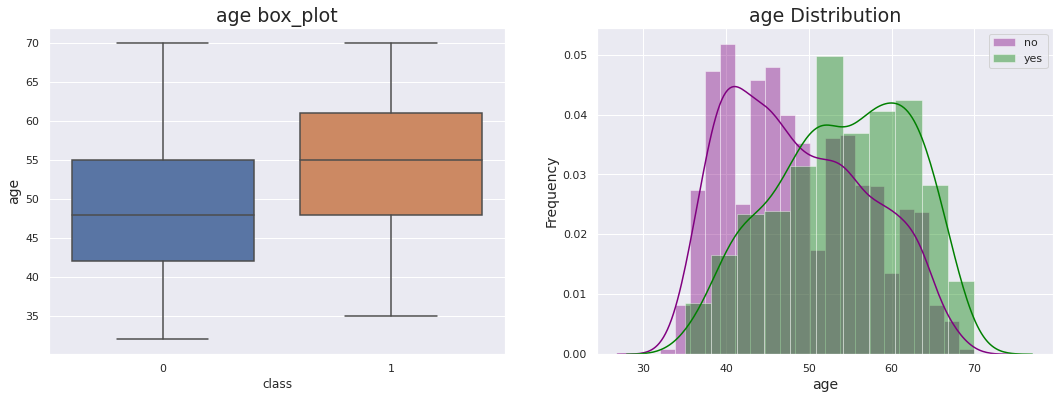

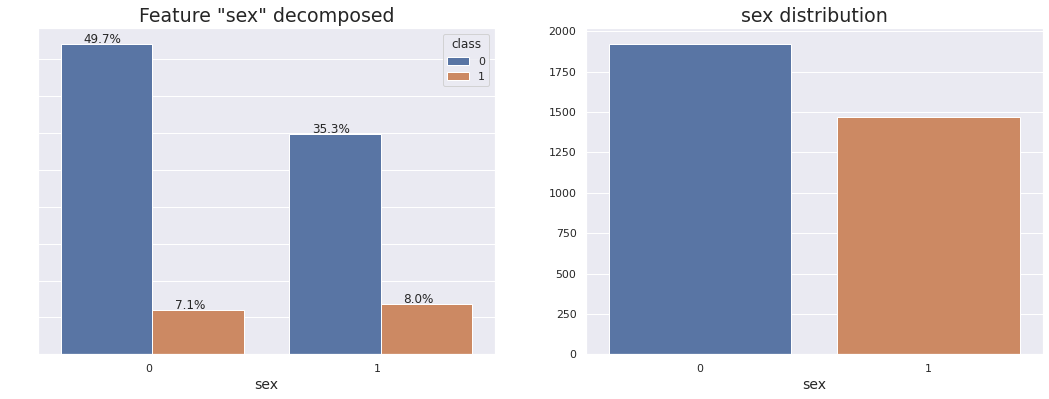

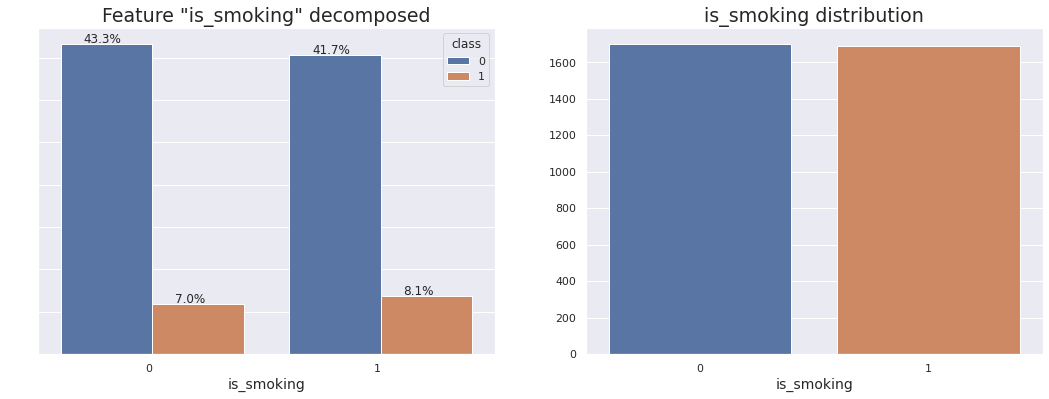

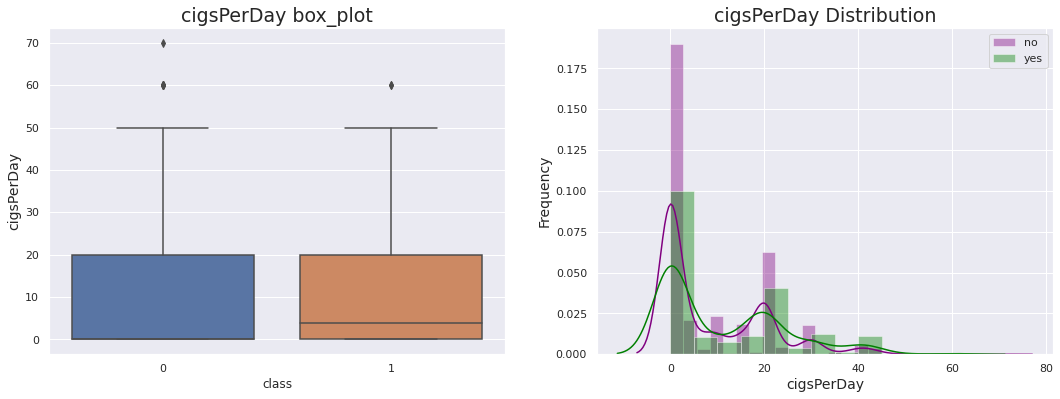

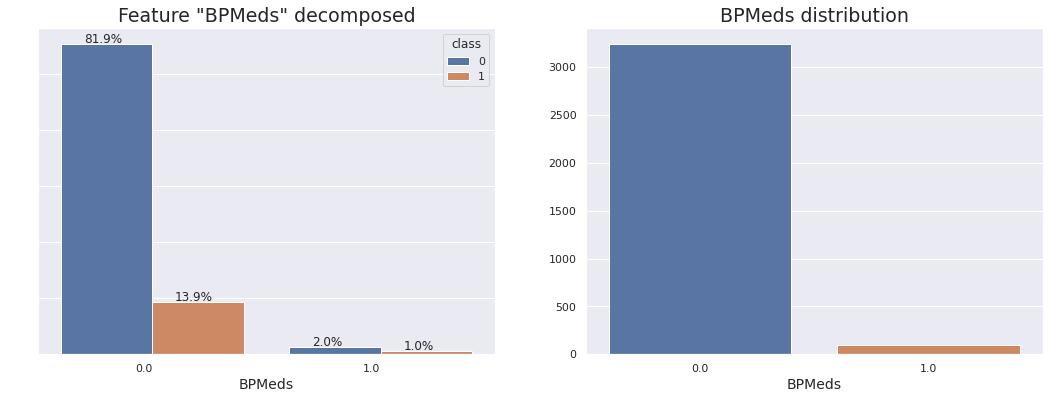

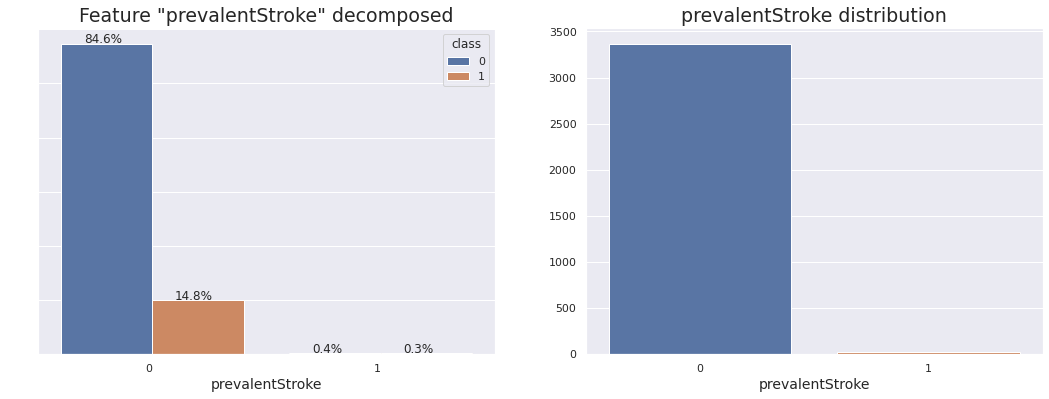

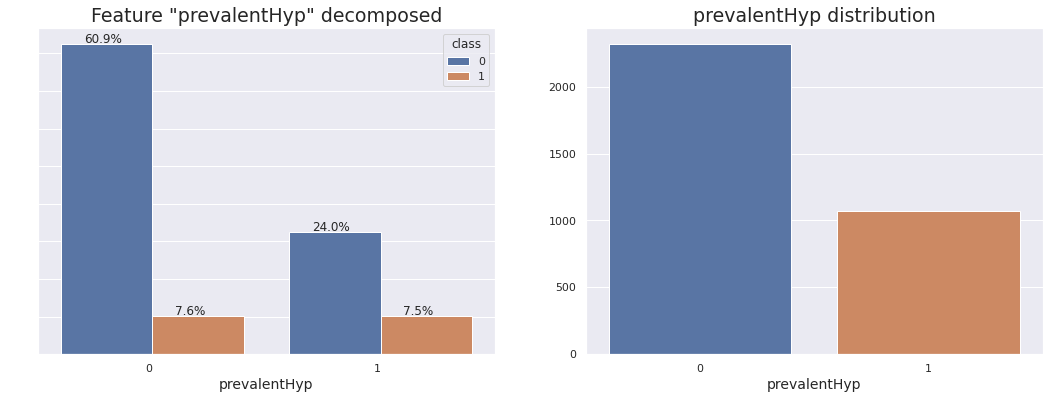

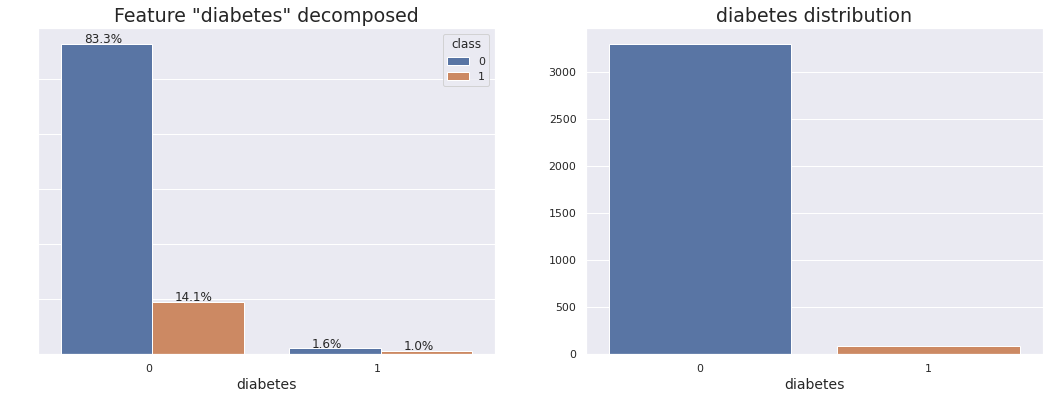

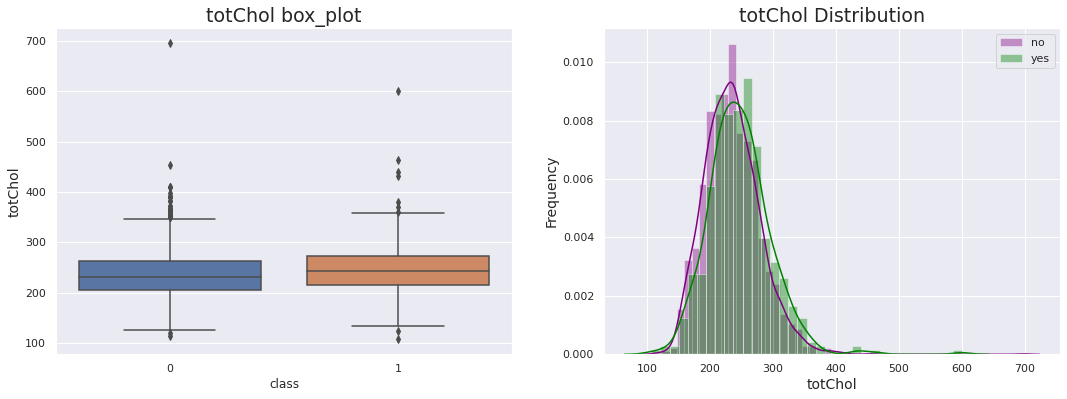

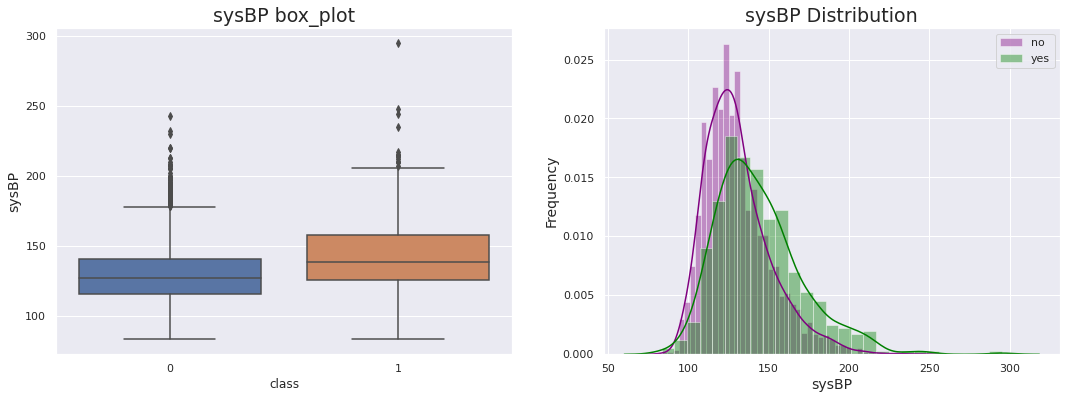

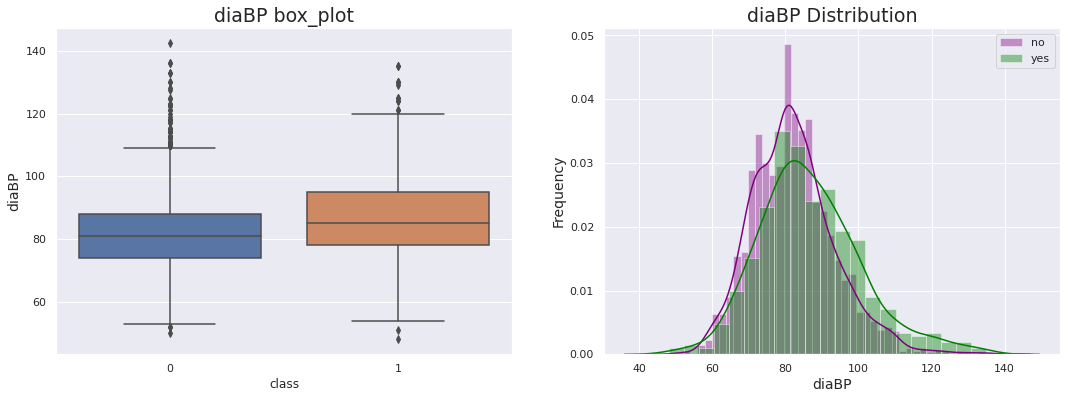

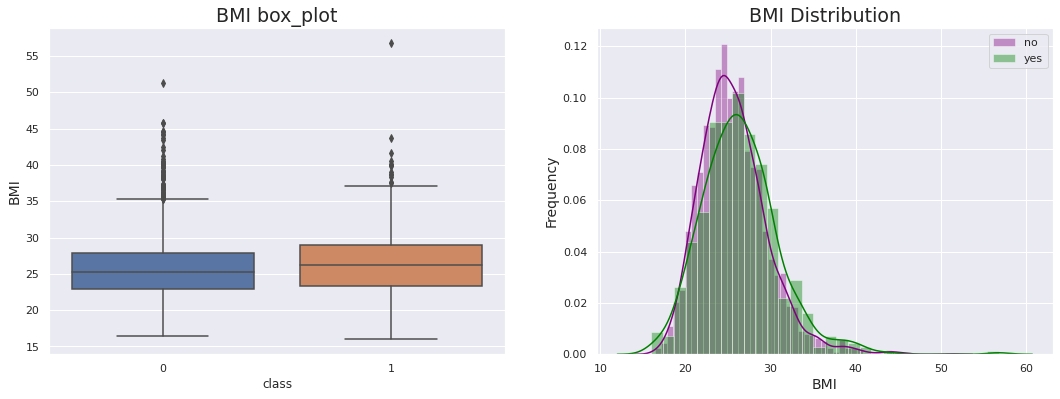

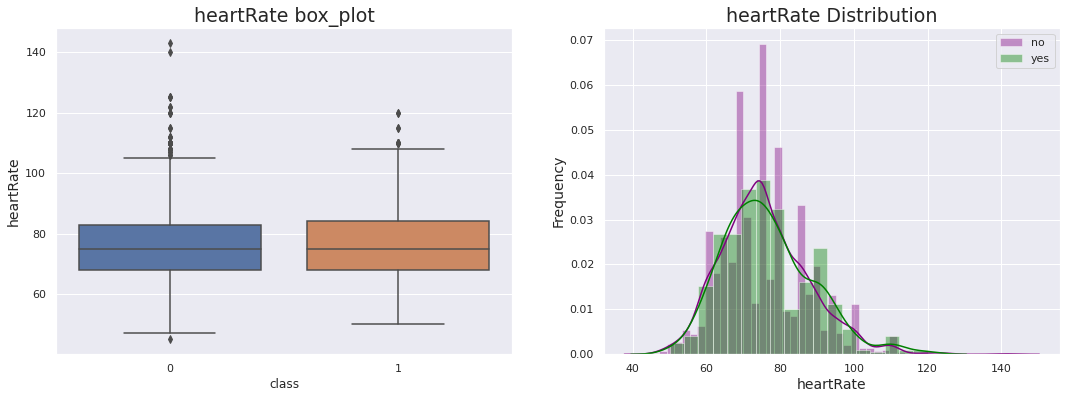

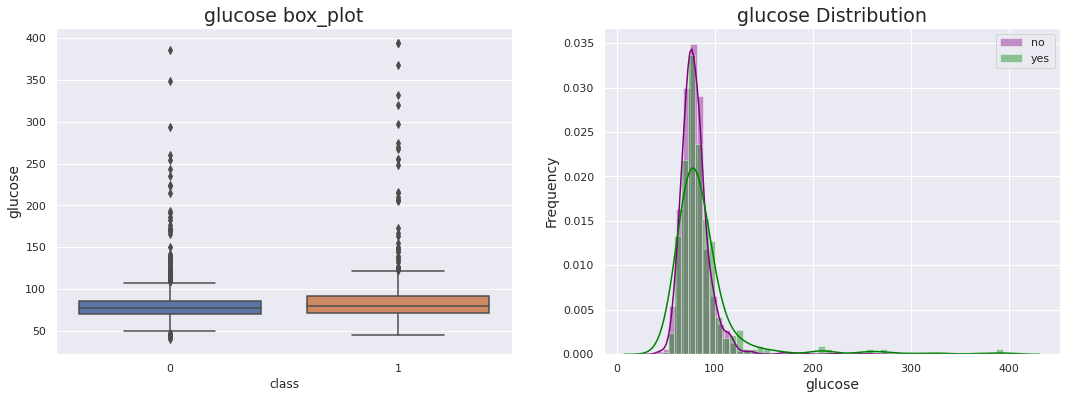

In [234]:
# Get plots for all the data except the dependent feature
get_eda(df,'class')

Learnings from EDA: (Note: risk means 'risk of cardiovascular diseases')
* As the age increases risk increases. Seems like a very important feature.
* Risk is marginally more in case of Male.
* Smokers and non-smokers have equal risk probabilities.
*  50% of people who have history of BP medication are prone to risk. BP medication feature is heavily imbalanced.
* Prevalent feature is heavily imbalanced.
* Prevalent hypertensive people are highly prone to risk.
* Diabetes feature is heavily imbalanced.
* People having total cholestrol more than 250 are more prone to risk. This feature has some outliers. Also, the classes are overlapping mostly.
* People having systolic BP more than 130 are more to risk. Seems like a very important feature
* People having diastolic more than 90 are more to risk. Classes are overlapping mostly.
* 'BMI', 'heartrate' and 'glucose'. these features have overlapping class distribution.

#### Outliers 
Let's remove who lies the most indecently.
Remove the ones unfits and unreachable to the herd.

In [235]:
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'class']

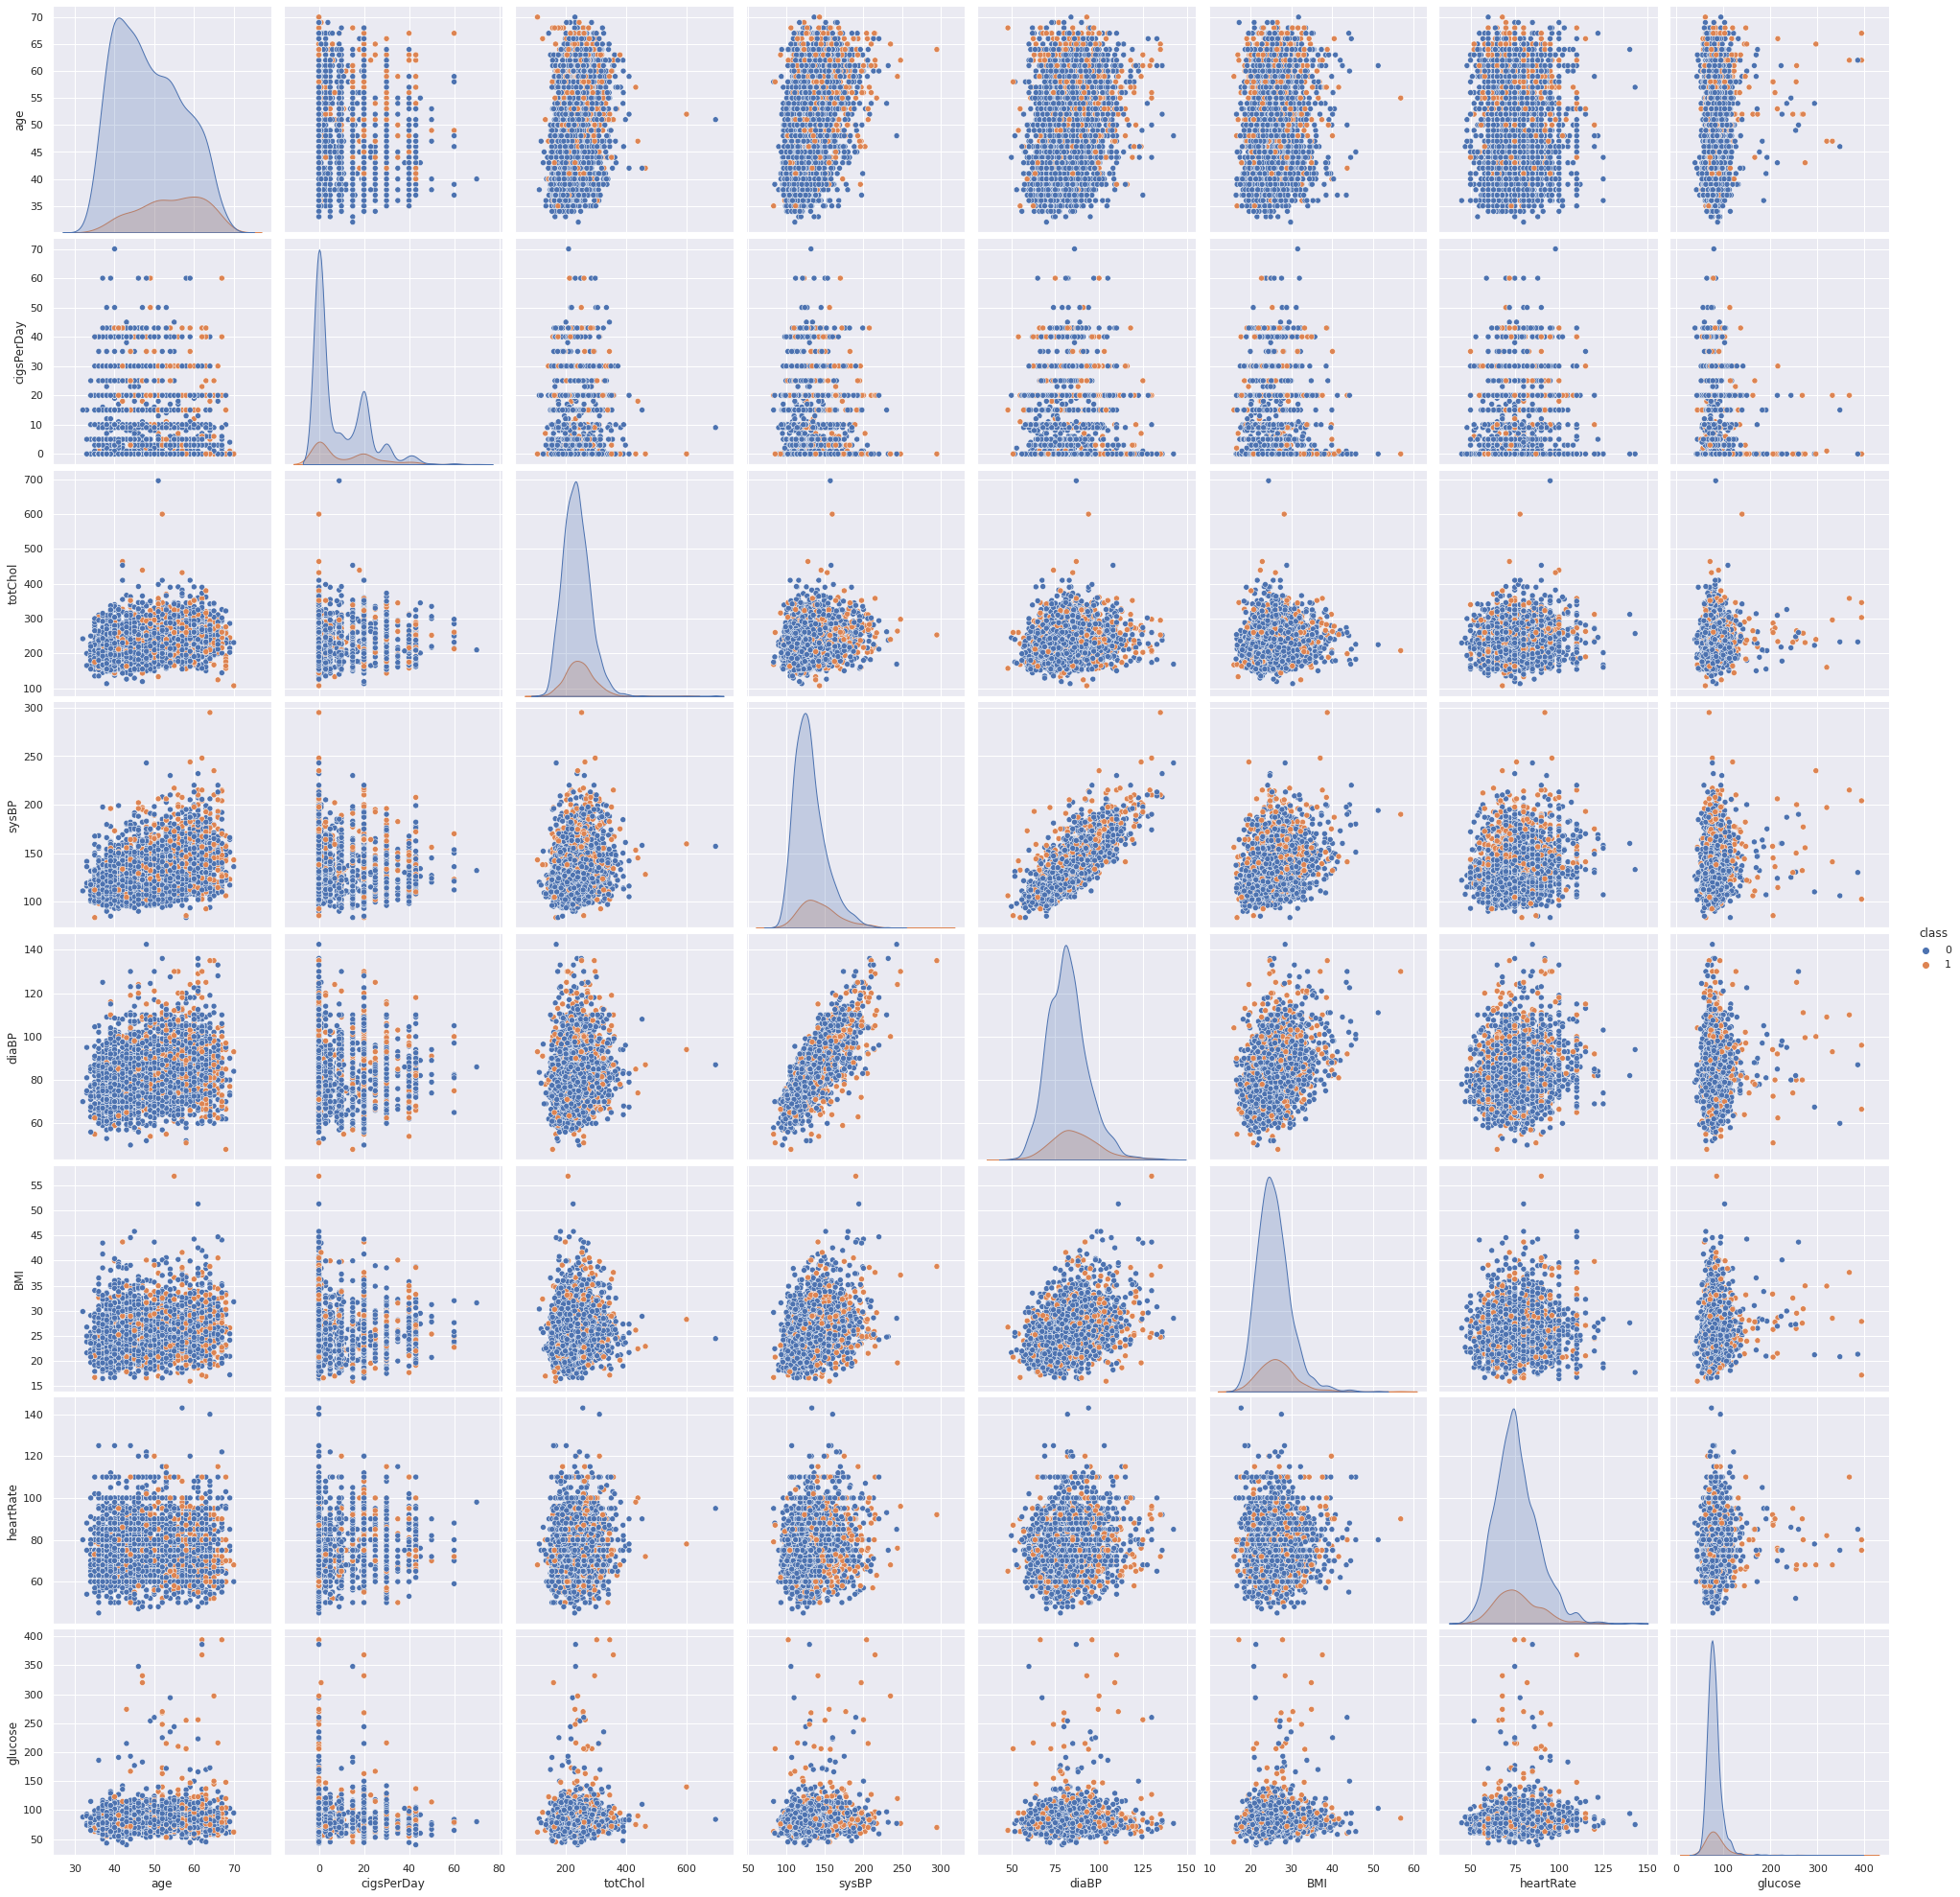

In [236]:
# Let's get a pair plot for numerical data
sns.pairplot(df[numerical_features] , hue='class',size = 3.5,dropna=True)

Large variance in the data and overlapping of the classes is eye watering 😭😭😭😭😭

In [237]:
for col in numerical_features:
  print(f'{col} : {df[col].quantile(.9995)}')

age : 69.3055000000004
cigsPerDay : 60.0
totChol : 508.13200000002325
sysBP : 245.22200000000157
diaBP : 136.0
BMI : 47.512499999999996
heartRate : 129.5900000000006
glucose : 389.65999999999985
class : 1.0


In [238]:
# Let's cap total cholestrol with max value of 500, total cholestrol is being mischievous
df = df[df['totChol']<500]

####There are outliers in few features, but I suspect that these outliers are essential in determining the target feature.

Let's check!

In [239]:
# 'cigsPerDay' feature has Upper Limit = 50
df[df['cigsPerDay']>50]['class'].value_counts()

0    7
1    2
Name: class, dtype: int64

In [240]:
# 'totChol' feature has Upper Limit = 350
df[df['totChol']>350]['class'].value_counts()

0    31
1    10
Name: class, dtype: int64

In [241]:
# 'sysBP' feature has Upper Limit = 180
df[df['sysBP']>180]['class'].value_counts()

0    79
1    49
Name: class, dtype: int64

In [242]:
# 'diaBP' feature has Upper Limit = 110
df[df['diaBP']>110]['class'].value_counts()

0    41
1    30
Name: class, dtype: int64

In [243]:
# 'BMI' feature has Upper Limit = 36
df[df['BMI']>36]['class'].value_counts()

0    53
1    17
Name: class, dtype: int64

In [244]:
# 'heartRate' feature has Upper Limit = 105
df[df['heartRate']>130]['class'].value_counts()

0    2
Name: class, dtype: int64

In [245]:
# 'glucose' feature has Upper Limit = 120
df[df['glucose']>120]['class'].value_counts()

0    42
1    38
Name: class, dtype: int64

* I conclude that most outliers are essential in determining the target class. So, we will move forward from here. It's too noisy here!

### Corelation Matrix of numerical features

In [246]:
numerical_features.pop(-1)

'class'

Text(0.5, 1.05, 'Pearson correlation of Features')

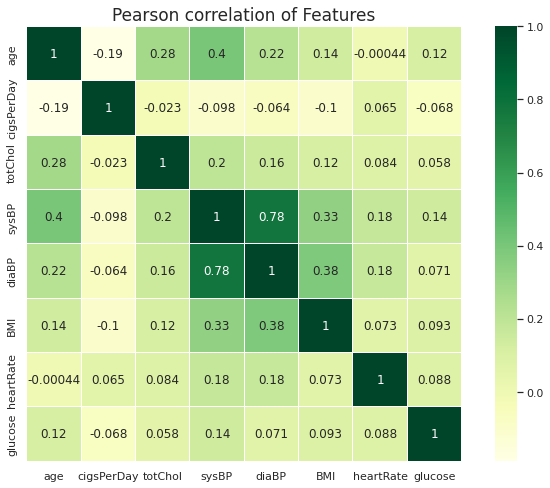

In [247]:
corr = df[numerical_features].corr()

f, ax = plt.subplots(figsize=(12,8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=17)

There appears to be a strong correlation between sysBP and diaBP. Rest features aren't worrisome.

## Handling missing/nan data

In [248]:
df.isna().sum() # Get number of missing values in each feature

age                  0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              43
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            275
class                0
dtype: int64

In [249]:
# Let's drop all the null values, we are losing nearly 10% of the data. But its okay, we don't want to risk the misappropriate imputation since the variance is large and most points are in favor of majority
df = df.dropna()

In [250]:
# Check the shape now
df.shape

(3002, 15)

Don't have love loss for the missing data, sometimes somethings has to go, its for the best or not no one can tell. But, we have to walk the walk...

In [251]:
print("We have dropped {} rows from the working dataset, which is {}% of the data.".format(heart_df.shape[0] - df.shape[0], round((heart_df.shape[0])/(heart_df.shape[0] - df.shape[0]), 1)))

We have dropped 388 rows from the working dataset, which is 8.7% of the data.


#### We have taken care of all the null values.

# <b><u>Feature engineering 

### Feature Engineering
Reducing the number of features by performing feature engineering on them is a great way to improve model performance, to reduce or eliminate multicollinearity and decrease the space requirement to store the data.

In [252]:
df.head()

age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
1   36    1           0         0.0     0.0                0             1   
2   46    0           1        10.0     0.0                0             0   
3   50    1           1        20.0     0.0                0             1   
4   64    0           1        30.0     0.0                0             0   
5   61    0           0         0.0     0.0                0             1   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  class  
1         0    212.0  168.0   98.0  29.77       72.0     75.0      0  
2         0    250.0  116.0   71.0  20.35       88.0     94.0      0  
3         0    233.0  158.0   88.0  28.26       68.0     94.0      1  
4         0    241.0  136.5   85.0  26.42       70.0     77.0      0  
5         0    272.0  182.0  121.0  32.80       85.0     65.0      1

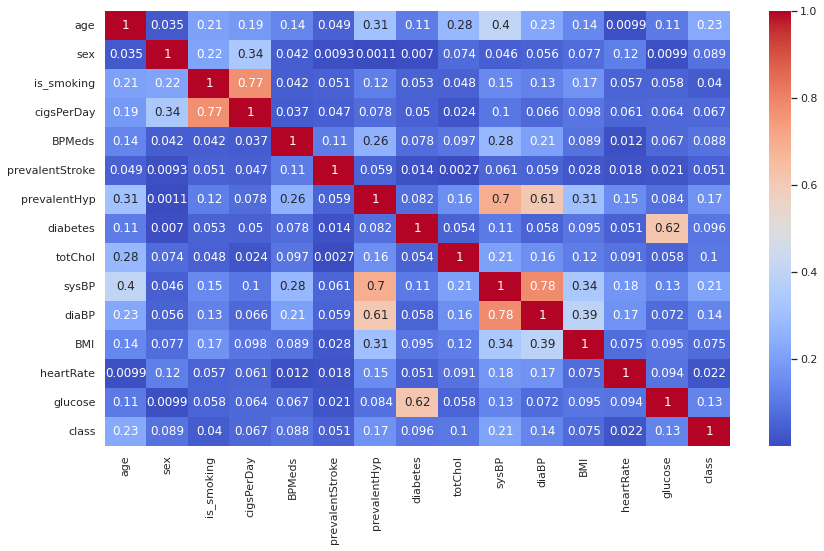

In [253]:
# Get the heatmap using seaborn.heatmap 
plt.figure(figsize=(14,8))
sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')

wait wait wait before removing features just on the basis of correlation...
Use one of the feature importance technique out there to double support your claim.

###Feature importance using Boruta


Here we will use the Boruta algorithm which is a wrapper built around the random forest classification algorithm. It tries to capture all the important, interesting features in a data set with respect to an outcome variable.

Methodology:
* Firstly, it adds randomness to the given data set by creating shuffled copies of all features (which are called shadow features).

* Then, it trains a random forest classifier on the extended data set and applies a feature importance measure (the default is Mean Decrease Accuracy) to evaluate the importance of each feature where higher means more important.

* At every iteration, it checks whether a real feature has a higher importance than the best of its shadow features (i.e. whether the feature has a higher Z-score than the maximum Z-score of its shadow features) and constantly removes features which are deemed highly unimportant.

* Finally, the algorithm stops either when all features get confirmed or rejected or it reaches a specified limit of random forest runs.

In [254]:
#define the features
X = df.drop('class',axis=1).values
y = df['class'].values

# Training the randomforest
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced',random_state=0)

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=0,random_state=0) # we are not interested now to hear the tales of how Boruta chose those features, so muting him with verbose=0
 
# find all relevant features
feat_selector.fit(X, y)

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=28, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F4380A64AF0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F4380A64AF0)

In [255]:
# Get the most important features
df.columns[:-1][feat_selector.support_].tolist()

['age', 'sysBP', 'BMI']

I wonder how BMI became so important. Classes were greatly intertwined in BMI, no? Also, its correlation with class is only 0.075 < 0.1.

See, you would have removed BMI but Boruta saved you! 🙂

In [256]:
# But we will use top 7 important features
top_columns = df.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_columns

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

ewwwwww...

None of the history feature was selected, I bet some of them are important!

I will take sum of all of them, together their impact will be stronger no?

In [257]:
# Let's combine history feature and create disease_history
df['disease_history'] = df['BPMeds'] + df['prevalentHyp'] + df['prevalentStroke'] + df['diabetes']

O o o o ...

We can combine Systolic blood pressure and diastolic blood pressure, let's check if it is a good idea,

In [258]:
#Let's combine max and min blood pressures  to get average blood pressure
df['avgBP'] = (df['sysBP']+df['diaBP'])/2

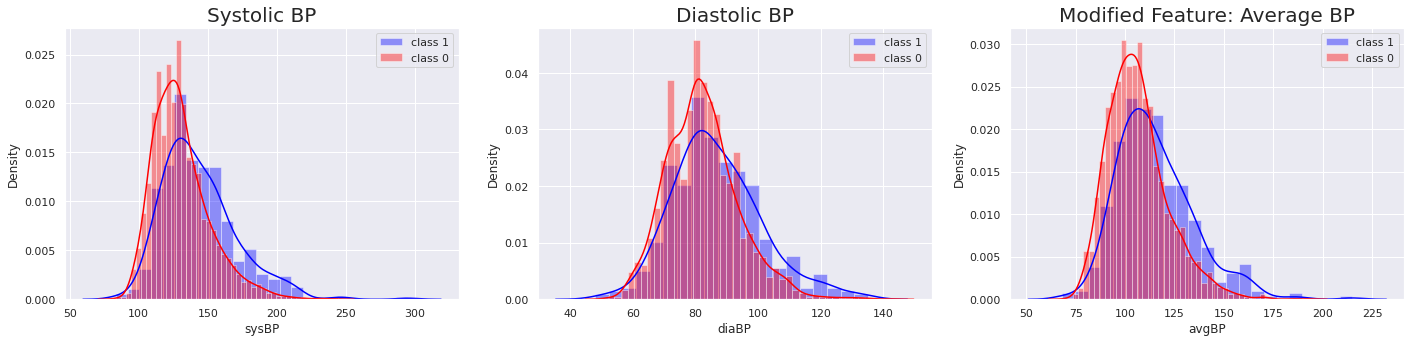

In [259]:
# Set plot dimension
plt.figure(figsize=(24,5))
# Plot systolic BP
plt.subplot(1,3,1)
sns.distplot(df[df['class']==1]['sysBP'],color='blue',label='class 1')
sns.distplot(df[df['class']==0]['sysBP'],color='red',label='class 0')
plt.title('Systolic BP', fontsize=20)
plt.legend()
# Plot diastolic BP
plt.subplot(1,3,2)
sns.distplot(df[df['class']==1]['diaBP'],color='blue',label='class 1')
sns.distplot(df[df['class']==0]['diaBP'],color='red',label='class 0')
plt.title('Diastolic BP', fontsize=20)
plt.legend()
# Plot average BP
plt.subplot(1,3,3)
sns.distplot(df[df['class']==1]['avgBP'],color='blue',label='class 1')
sns.distplot(df[df['class']==0]['avgBP'],color='red',label='class 0')
plt.title('Modified Feature: Average BP', fontsize=20)
plt.legend()

plt.show()

Okay, we have a go ahead.

Add those features be careful while adding them...

#<b><u> Feature Selection

### Select the features that are important for the analysis

In [260]:
# Create a new dataframe with only top 6 features
df_new = df[['age', 'cigsPerDay', 'totChol', 'avgBP', 'BMI', 'heartRate', 'glucose', 'disease_history', 'class']]

In [261]:
#Check the new dataframe
df_new.head()

age  cigsPerDay  totChol   avgBP    BMI  heartRate  glucose  \
1   36         0.0    212.0  133.00  29.77       72.0     75.0   
2   46        10.0    250.0   93.50  20.35       88.0     94.0   
3   50        20.0    233.0  123.00  28.26       68.0     94.0   
4   64        30.0    241.0  110.75  26.42       70.0     77.0   
5   61         0.0    272.0  151.50  32.80       85.0     65.0   

   disease_history  class  
1              1.0      0  
2              0.0      0  
3              1.0      1  
4              0.0      0  
5              1.0      1

###How does my data looks now?

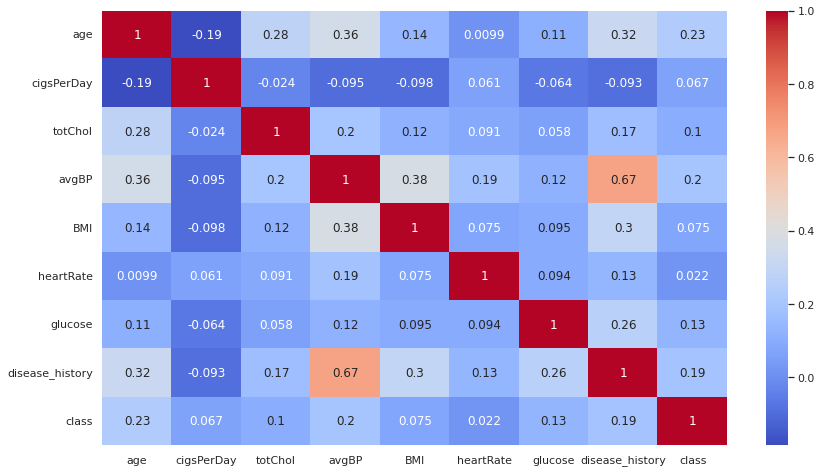

In [262]:
# Get the heatmap using seaborn.heatmap 
plt.figure(figsize=(14,8))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')

In [263]:
# Get class balance for categorical features
for col in df_new.columns:
  if df_new[col].nunique()<20:
    print(col+'**'*15)
    print(df[col].value_counts())
    if col!='class':
      print(df_new[df_new[col]==1]['class'].value_counts())
    print(" ")

disease_history******************************
0.0    2015
1.0     855
2.0     117
3.0      15
Name: disease_history, dtype: int64
0    665
1    190
Name: class, dtype: int64
 
class******************************
0    2546
1     456
Name: class, dtype: int64
 


You know we can do one more little thing decompse the categories in disease_history feature, for no troubles, it's always best to have each of them as a separate variable,

* one definite complication we can avoid is class imbalance due to train test split, I mean we don't always pay much attention to the training and testing dataset. It also is a algorithm, it makes mistakes and need a lot of human guidance.
* During the use of oversampling technique these categories in a categorical feature can be treated as continuous feature and create unfounded categories (e.g. SMOTE where it generates observations, it is also not perfect )

In [264]:
# Get dummy variables for the diseased_history feature
df_new = pd.get_dummies(df_new, columns=["disease_history"])
df_new.head()

age  cigsPerDay  totChol   avgBP    BMI  heartRate  glucose  class  \
1   36         0.0    212.0  133.00  29.77       72.0     75.0      0   
2   46        10.0    250.0   93.50  20.35       88.0     94.0      0   
3   50        20.0    233.0  123.00  28.26       68.0     94.0      1   
4   64        30.0    241.0  110.75  26.42       70.0     77.0      0   
5   61         0.0    272.0  151.50  32.80       85.0     65.0      1   

   disease_history_0.0  disease_history_1.0  disease_history_2.0  \
1                    0                    1                    0   
2                    1                    0                    0   
3                    0                    1                    0   
4                    1                    0                    0   
5                    0                    1                    0   

   disease_history_3.0  
1                    0  
2                    0  
3                    0  
4                    0  
5                    0

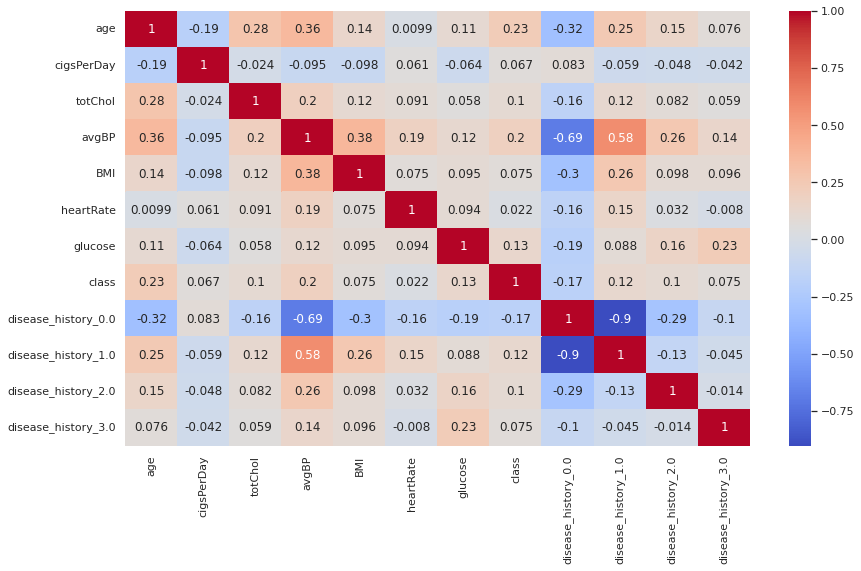

In [265]:
# Again get a heatmap of correlation to know which one of these disease_history feature has most correlation
plt.figure(figsize=(14,8))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')

In [266]:
# Drop disease_history_1.0 since it has less correlation with class
df_new.drop('disease_history_0.0',axis=1,inplace=True)

Text(0.5, 1.0, 'Features and correlations')

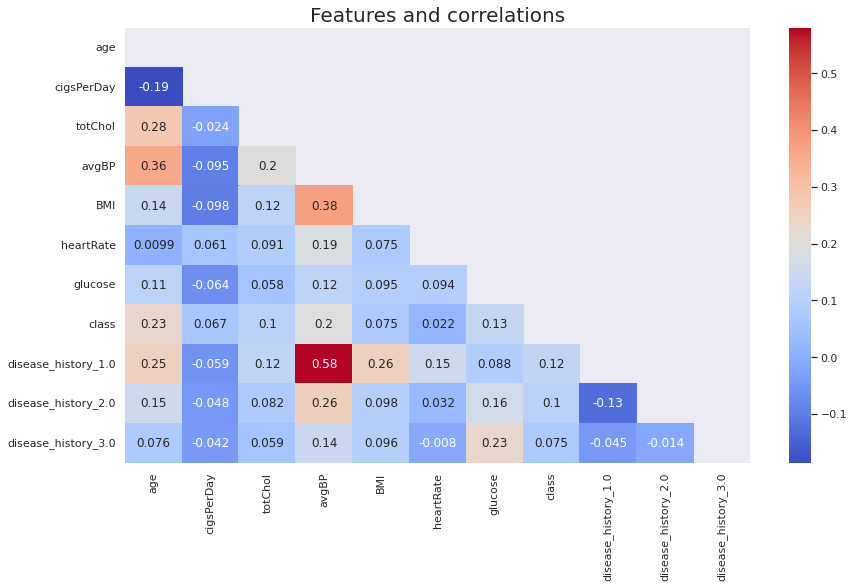

In [267]:
# Again get a heatmap of correlation to know which one of these disease_history feature has most correlation
plt.figure(figsize=(14,8))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm',mask = np.triu(df_new.corr()))
plt.title('Features and correlations',fontsize=20)

In [268]:
# Get the shape of cleaned df
df_new.shape

(3002, 11)

# <b><u> Create Train and Test datasets </b></u>

Since the dataset is imbalanced, We will be having three different training datasets and one test dataset:

>  1st from train_test_split 

> 2nd from undersampling using tomeklinks

> 3rd from oversampling using SMOTE


##Split the original data into train and test dataset using train_test_split


In [269]:
# Remember how our dataframe looked like, no? Lets view it again.
df_new.head()

age  cigsPerDay  totChol   avgBP    BMI  heartRate  glucose  class  \
1   36         0.0    212.0  133.00  29.77       72.0     75.0      0   
2   46        10.0    250.0   93.50  20.35       88.0     94.0      0   
3   50        20.0    233.0  123.00  28.26       68.0     94.0      1   
4   64        30.0    241.0  110.75  26.42       70.0     77.0      0   
5   61         0.0    272.0  151.50  32.80       85.0     65.0      1   

   disease_history_1.0  disease_history_2.0  disease_history_3.0  
1                    1                    0                    0  
2                    0                    0                    0  
3                    1                    0                    0  
4                    0                    0                    0  
5                    1                    0                    0

Preprocessing the data by normalizing it because we intend to use Naive Bayes complementNB variant which doesn't take negative values.

Normalizing scales the data between limit [0,1]. So, scales of all the features becomes same. It is one of the goto technique to have the equal variance across the data. 

Tree based algorithms are unaffected by this transformation.

But algorithms which needs homscedasticity in the data needs data in such scaled format.

In [270]:
# It's best to normalize the data first 
scalar = MinMaxScaler()

In [271]:
# Getting standardized X 
X = pd.DataFrame(scalar.fit_transform(df_new.drop('class',axis=1)),columns=df_new.drop('class',axis=1).columns)

# Get y
y = df_new['class']

In [272]:
# View the independent feature dataset
X.head()

age  cigsPerDay   totChol     avgBP       BMI  heartRate   glucose  \
0  0.105263    0.000000  0.282051  0.441227  0.338149   0.275510  0.098870   
1  0.368421    0.142857  0.390313  0.172061  0.107493   0.438776  0.152542   
2  0.473684    0.285714  0.341880  0.373083  0.301175   0.234694  0.152542   
3  0.842105    0.428571  0.364672  0.289608  0.256121   0.255102  0.104520   
4  0.763158    0.000000  0.452991  0.567291  0.412341   0.408163  0.070621   

   disease_history_1.0  disease_history_2.0  disease_history_3.0  
0                  1.0                  0.0                  0.0  
1                  0.0                  0.0                  0.0  
2                  1.0                  0.0                  0.0  
3                  0.0                  0.0                  0.0  
4                  1.0                  0.0                  0.0

In [273]:
# Train-test split, saving 20% data for validating the models. Set random_state = some number for reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state=0)

# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(2401, 10) (2401,)
(601, 10) (601,)


In [274]:
# Check the value count in y_train dataset
y_train.value_counts()

0    2048
1     353
Name: class, dtype: int64

In [275]:
# Check the value count in y_test dataset
y_test.value_counts()

0    498
1    103
Name: class, dtype: int64

In [276]:
# Get class balance of categorical features
for col in X_train.columns:
  if X_train[col].nunique()<20:
    print(col+'**'*15)
    print(X_train[col].value_counts())
    print(" ")

disease_history_1.0******************************
0.0    1733
1.0     668
Name: disease_history_1.0, dtype: int64
 
disease_history_2.0******************************
0.0    2303
1.0      98
Name: disease_history_2.0, dtype: int64
 
disease_history_3.0******************************
0.0    2389
1.0      12
Name: disease_history_3.0, dtype: int64
 


## Resampled Datasets

Our dataset is imbalanced, one way to get better expected results is to oversample the dataset with SMOTE but but but...

remember...

you can only oversample the train dataset and not the test dataset, because the test dataset is nothing but representation of real world dataset which is not in your control.

Or you can undersamle the majority in the dataset.

###Under-Sampling: Tomek links



Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

Tomek’s link exists if the two samples are the nearest neighbors of each other.

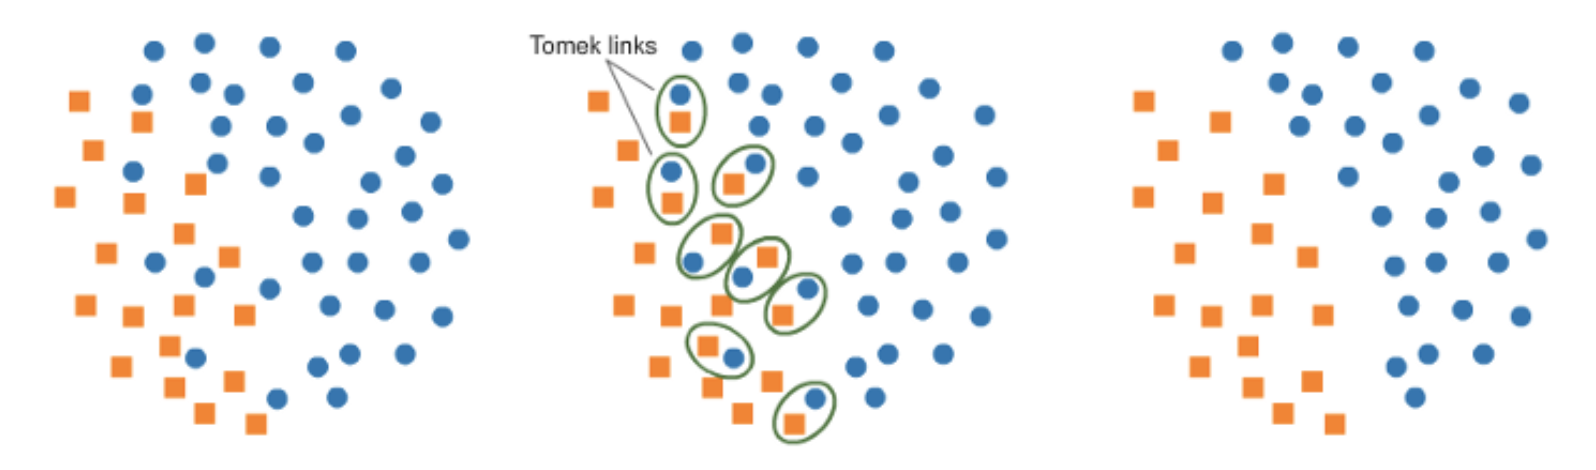

In [277]:
from imblearn.under_sampling import TomekLinks # Import the tomeklink module

tl = TomekLinks(sampling_strategy='majority') # initialize the Tomeklinks algorithm

# Use fit_resample to get undersampled majority
X_tl, y_tl = tl.fit_resample(X_train, y_train)

# Print the original and resampled shape
print('Original dataset shape:', len(X_train))
print('Resampled dataset shape', len(y_tl))

Original dataset shape: 2401
Resampled dataset shape 2288


In [278]:
# Get class value count
y_tl.value_counts()

0    1935
1     353
Name: class, dtype: int64

In [279]:
# Get class balance of categorical features
for col in X_tl.columns:
  if X_tl[col].nunique()<20:
    print(col+'**'*15)
    print(X_tl[col].value_counts())
    print(" ")

disease_history_1.0******************************
0.0    1668
1.0     620
Name: disease_history_1.0, dtype: int64
 
disease_history_2.0******************************
0.0    2196
1.0      92
Name: disease_history_2.0, dtype: int64
 
disease_history_3.0******************************
0.0    2276
1.0      12
Name: disease_history_3.0, dtype: int64
 


### Oversampling with SMOTE


SMOTE algorithm works in 4 simple steps:

* Choose a minority class as the input vector
* Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
* Repeat the steps until data is balanced

In [280]:
from imblearn.over_sampling import SMOTE # Import SMOTE module

smote = SMOTE(random_state=0,k_neighbors=4) # Initialize the algorithm

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_tl,y_tl)

# Get original and resampled shape
print('Original dataset shape', len(X_tl))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 2288
Resampled dataset shape 3870


In [281]:
# Get X_smote columns
X_smote.columns

Index(['age', 'cigsPerDay', 'totChol', 'avgBP', 'BMI', 'heartRate', 'glucose',
       'disease_history_1.0', 'disease_history_2.0', 'disease_history_3.0'],
      dtype='object')

In [282]:
y_smote.value_counts()

0    1935
1    1935
Name: class, dtype: int64

In [283]:
# Get class balance of categorical features
for col in X_smote.columns:
  if X_smote[col].nunique()<20:
    print(col+'**'*15)
    print(X_smote[col].value_counts())
    print(" ")

disease_history_1.0******************************
0.0    2612
1.0    1258
Name: disease_history_1.0, dtype: int64
 
disease_history_2.0******************************
0.0    3628
1.0     242
Name: disease_history_2.0, dtype: int64
 
disease_history_3.0******************************
0.0    3833
1.0      37
Name: disease_history_3.0, dtype: int64
 


All good now.

## Get plot of Comparison of number of observation in each dataset. 

In [284]:
# Create list to store the number of rows in each datasets
total_list = [ y_train.shape[0],  y_tl.shape[0], y_smote.shape[0], y_test.shape[0]] 
class_0_list = [y_train.value_counts()[0],y_tl.value_counts()[0], y_smote.value_counts()[0], y_test.value_counts()[0]]
class_1_list = [y_train.value_counts()[1],y_tl.value_counts()[1], y_smote.value_counts()[1], y_test.value_counts()[1]]

# Create label list
dataset_name=['y_train', 'y_tl','y_smote', 'y_test']

In [285]:
shape = pd.DataFrame(list(zip(total_list,class_0_list,class_1_list)), index=dataset_name, columns=['total','class0','class1']).reset_index()
shape

index  total  class0  class1
0  y_train   2401    2048     353
1     y_tl   2288    1935     353
2  y_smote   3870    1935    1935
3   y_test    601     498     103

In [286]:
melted_shape = shape.melt(id_vars='index')
melted_shape

index variable  value
0   y_train    total   2401
1      y_tl    total   2288
2   y_smote    total   3870
3    y_test    total    601
4   y_train   class0   2048
5      y_tl   class0   1935
6   y_smote   class0   1935
7    y_test   class0    498
8   y_train   class1    353
9      y_tl   class1    353
10  y_smote   class1   1935
11   y_test   class1    103

Text(0.5, 1.0, 'Comparison of number of rows in each dataset')

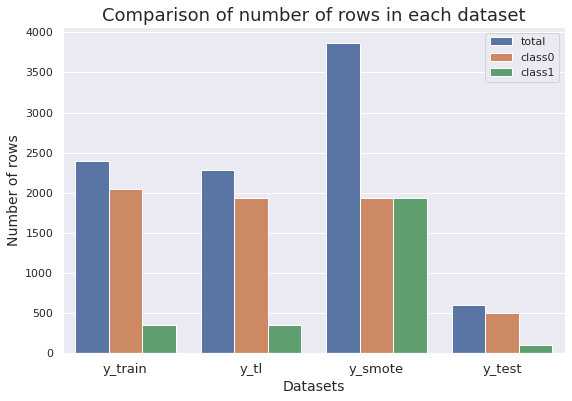

In [287]:
# Configuration for the plot
plt.figure(figsize=(9,6))
ax = sns.barplot(x="index", y="value", hue="variable", data=melted_shape)
ax.legend(loc='upper right')
plt.xticks(fontsize=13)
ax.set_ylabel('Number of rows',fontsize=14)
ax.set_xlabel('Datasets',fontsize=14)
ax.set_title('Comparison of number of rows in each dataset', fontsize=18)

# <b><u>Important Functions Must RUN</b></u>

It's smart to create functions and classes so you don't have to run same functions over and over again.
> 1. Individual model performance : we will test all the models individually first.
> 2. Confusion matrix : we will understand how good the model is at classification using confusion matrix.
> 3. roc_curve : An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds from 0 to 1. This curve plots two parameters: True Positive Rate. False Positive Rate

### <u>Important Function. Must RUN</u> : individual_model_performance(model_name,X_train,X_test,y_train,y_test)  

This function will be called after every model to check the model performance.
It's important to run this one first, before moving forward.

In [288]:
# Get the accuracy score for the individual model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores for various evaluation metrics
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores for various evaluation metrics
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]
  
  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

### <u>Important Function. Must RUN</u>: get_confusion_matrix(model_name, X, y, label)
This function will be called after every model to get the confusion matrix.
It's important to run this one first, before moving forward.

In [289]:
# Get the confusion matrix and label it
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

### <u>Important Function. Must RUN</u>: get_roc_curve(model, X_test,y_test,plot_title,legend_label)
This function will be called after every model to get the roc_auc.
It's important to run this one first, before moving forward.

In [290]:
def get_roc_curve(model, X_test,y_test,plot_title,legend_label):
  from sklearn.metrics import roc_curve, auc # import the library

  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y_test, [0 for _ in range(len(y_test))])
  lr_fpr, lr_tpr, _ = roc_curve(y_test, model.predict(X_test))

  plt.figure(figsize=(9,6))
  # plot the roc curve for the model
  plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  plt.plot(lr_fpr, lr_tpr, marker='.', label=legend_label)
  # axis labels
  plt.xlabel('False Positive Rate',fontsize=14)
  plt.ylabel('True Positive Rate',fontsize=14)
  plt.title(plot_title,fontsize=19)
  # show the legend
  plt.legend()
  # show the plot
  plt.show()

# <u><b>Create Baseline models</u></b>

Building basline models and then going for best model building is a smart time saving method used by many professionals. 


Reason being, some of the models like tree ensembles, SVM take long time in finding best hyperparameters to get best performance. 

Here, we have 3 training datasets and we will test number of algorithms, fine-tuning each algorithm is a worst method here.

Metric Trap:

Don't make a mistake of judging classification model by its accuracy. There are other widely used metrics like precision, recall, fscore and auc_roc. Based on demand of application one or more can be used to evaluate the performance of the model.

For this application, roc_auc is important as it will give importance to both majority and minority class. 



### Now, we have created three train datasets, their names are,
1) X_train , y_train

2) X_tl , y_tl

3) X_smote , y_smote

###And one test dataset
X_test, y_test



## <u>Naive Bayes model

### Naive Bayes (Trained using original dataset)

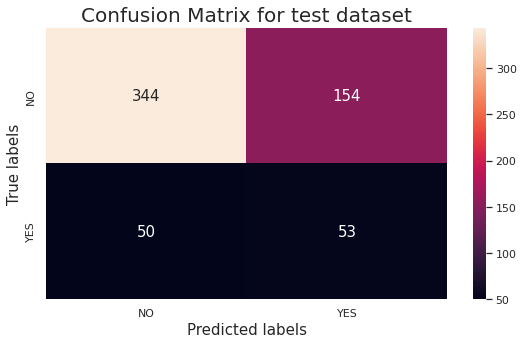

In [291]:
# Train the naive bayes model on original data
naive_o = ComplementNB().fit(X_train,y_train)

# get confusion matrix for train data
get_confusion_matrix(naive_o, X_test, y_test, 'test')

In [292]:
# Get model performance using function I built, model_performance
individual_model_performance(naive_o,X_train,X_test,y_train,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.322004                  0.341935
1   Accuracy                   0.684298                  0.660566
2     Recall                   0.509915                  0.514563
3  Precision                   0.235294                  0.256039
4   log_loss                  10.904148                 11.723849
5    roc_auc                   0.612135                  0.602663

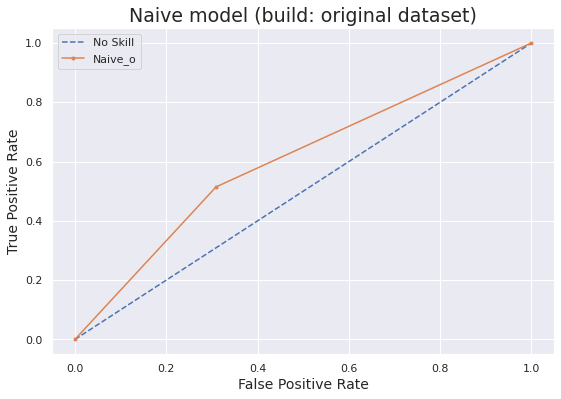

In [293]:
get_roc_curve(naive_o, X_test,y_test,'Naive model (build: original dataset)', 'Naive_o')

It has set a pretty decent baseline for us, good job naive!

### Naive Bayes (Trained using tomeklink dataset)

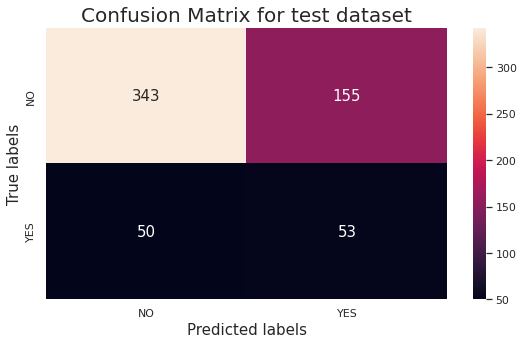

In [294]:
# Train naive bayes on tomeklink dataset
naive_tl = ComplementNB().fit(X_tl,y_tl)

# get confusion matrix for train data
get_confusion_matrix(naive_tl,X_test,y_test,'test')

In [295]:
# Get model performance using function I built, model_performance
individual_model_performance(naive_tl,X_tl,X_test,y_tl,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.336763                  0.340836
1   Accuracy                   0.690122                  0.658902
2     Recall                   0.509915                  0.514563
3  Precision                   0.251397                  0.254808
4   log_loss                  10.702981                 11.781320
5    roc_auc                   0.616456                  0.601659

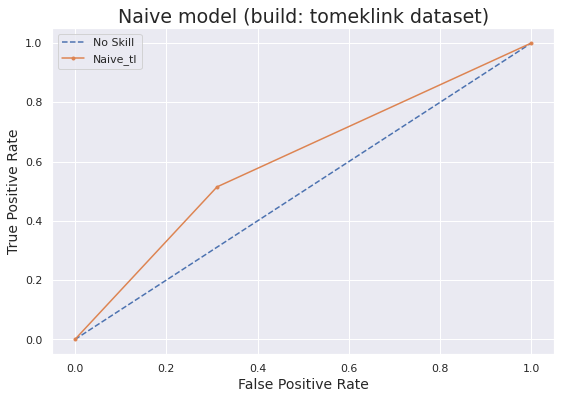

In [296]:
get_roc_curve(naive_tl, X_test,y_test,'Naive model (build: tomeklink dataset)','Naive_tl')

No improvement 😢.

### Naive Bayes (Trained using smote dataset)

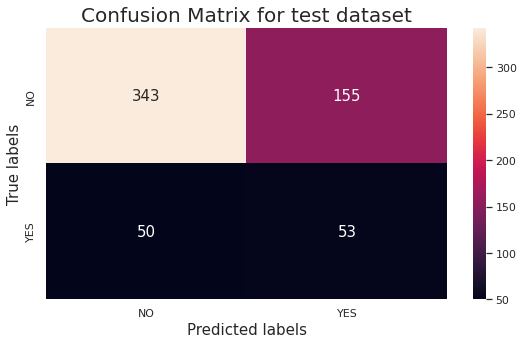

In [297]:
# Train naive bayes on tomeklink dataset
naive_sm = ComplementNB().fit(X_smote,y_smote)

# get confusion matrix for train data
get_confusion_matrix(naive_sm,X_test,y_test,'test')

In [298]:
# Get model performance using function I built, model_performance
individual_model_performance(naive_sm,X_smote,X_test,y_smote,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.571924                  0.340836
1   Accuracy                   0.617054                  0.658902
2     Recall                   0.511628                  0.514563
3  Precision                   0.648330                  0.254808
4   log_loss                  13.226588                 11.781320
5    roc_auc                   0.617054                  0.601659

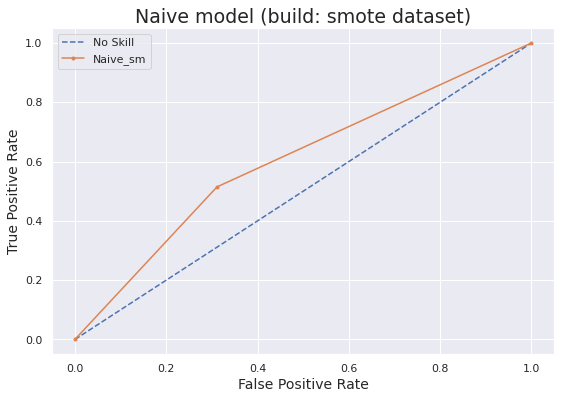

In [299]:
get_roc_curve(naive_sm, X_test,y_test,'Naive model (build: smote dataset)', 'Naive_sm')

No improvement 😢.

## <u>Logistic regression model 

### Logistic Regression (Trained using original dataset)

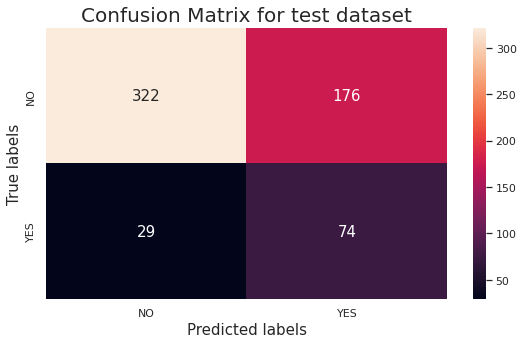

In [300]:
# Train the naive bayes model on original data
lr_o = LogisticRegression(class_weight='balanced').fit(X_train,y_train)

# get confusion matrix for train data
get_confusion_matrix(lr_o,X_test,y_test,'test')

In [301]:
# Get model performance using function I built, model_performance
individual_model_performance(lr_o,X_train,X_test,y_train,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.382284                  0.419263
1   Accuracy                   0.668888                  0.658902
2     Recall                   0.696884                  0.718447
3  Precision                   0.263383                  0.296000
4   log_loss                  11.436434                 11.781348
5    roc_auc                   0.680473                  0.682516

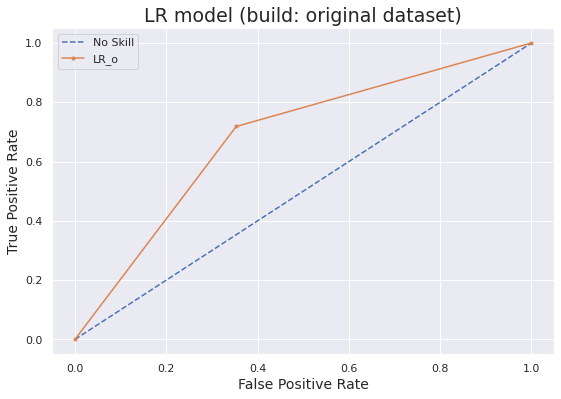

In [302]:
get_roc_curve(lr_o, X_test,y_test,'LR model (build: original dataset)','LR_o')

Considerable improvement over Naive model.

### Logistic Regression (Trained using tomeklink dataset)

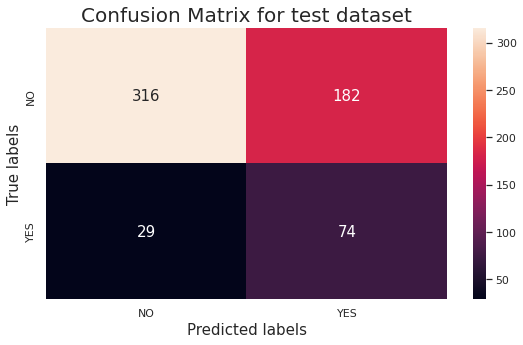

In [303]:
# Train naive bayes on tomeklink dataset
lr_tl = LogisticRegression(class_weight='balanced').fit(X_tl,y_tl)

# get confusion matrix for train data
get_confusion_matrix(lr_tl,X_test,y_test,'test')

In [304]:
# Get model performance using function I built, model_performance

individual_model_performance(lr_tl,X_tl,X_test,y_tl,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.402280                  0.412256
1   Accuracy                   0.679196                  0.648918
2     Recall                   0.699717                  0.718447
3  Precision                   0.282286                  0.289062
4   log_loss                  11.080404                 12.126169
5    roc_auc                   0.687584                  0.676492

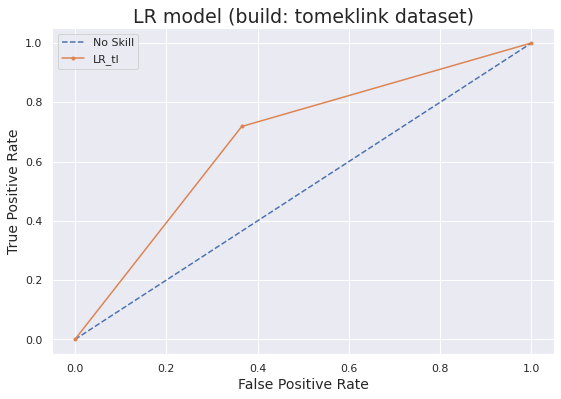

In [305]:
get_roc_curve(lr_tl, X_test,y_test,'LR model (build: tomeklink dataset)','LR_tl')

Results are more balanced.

### Logistic Regression (Trained using smote dataset)

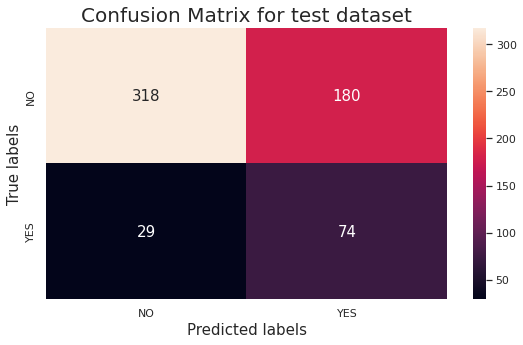

In [306]:
# Train naive bayes on tomeklink dataset
lr_sm = LogisticRegression(class_weight='balanced').fit(X_smote,y_smote)

# get confusion matrix for train data
get_confusion_matrix(lr_sm,X_test,y_test,'test')

In [307]:
# Get model performance using function I built, model_performance
individual_model_performance(lr_sm,X_smote,X_test,y_smote,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.693130                  0.414566
1   Accuracy                   0.688372                  0.652246
2     Recall                   0.703876                  0.718447
3  Precision                   0.682707                  0.291339
4   log_loss                  10.763377                 12.011228
5    roc_auc                   0.688372                  0.678500

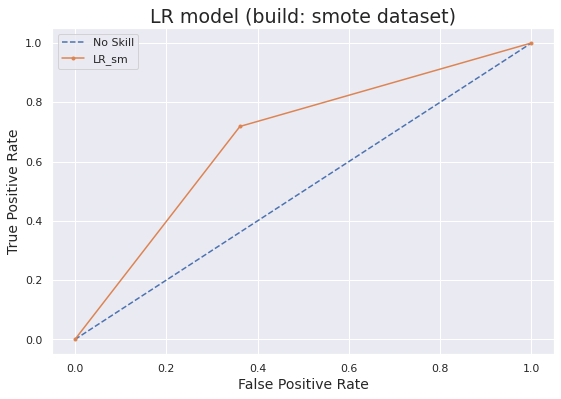

In [308]:
get_roc_curve(lr_sm, X_test,y_test,'LR model (build: smote dataset)','LR_sm')

Results are marginally better on test dataset but marginally worse on train dataset.🙂

So, no improvement.

Current best roc_auc score is 0.671804

## <u>Support vector machine model

### Support vector machine model (Trained using original dataset)

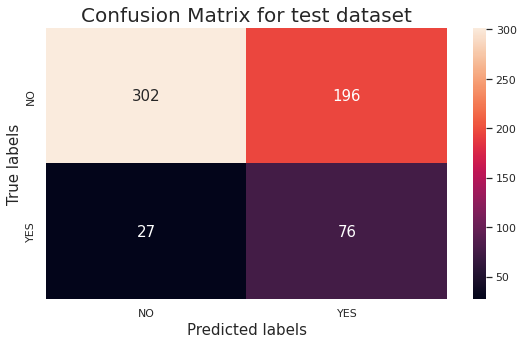

In [309]:
# Train the naive bayes model on original data
svc_o = SVC(kernel='linear',class_weight='balanced', probability=True).fit(X_train,y_train)

# get confusion matrix for train data
get_confusion_matrix(svc_o,X_test,y_test,'test')

In [310]:
# Get model performance using function I built, model_performance
individual_model_performance(svc_o,X_train,X_test,y_train,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.383010                  0.405333
1   Accuracy                   0.655144                  0.628952
2     Recall                   0.728045                  0.737864
3  Precision                   0.259858                  0.279412
4   log_loss                  11.911159                 12.815813
5    roc_auc                   0.685312                  0.672145

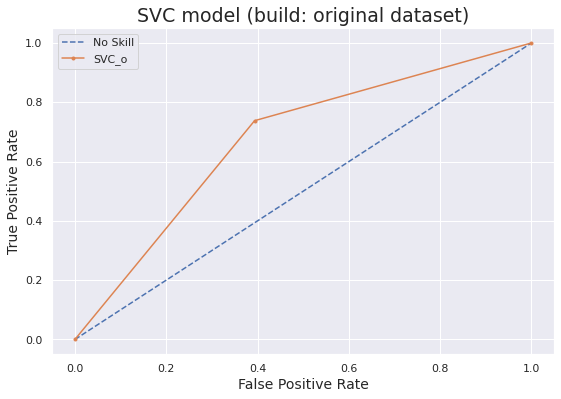

In [311]:
get_roc_curve(svc_o, X_test,y_test,'SVC model (build: original dataset)','SVC_o')

No improvement on the score 😢

### Support vector machine (Trained using tomeklink dataset)

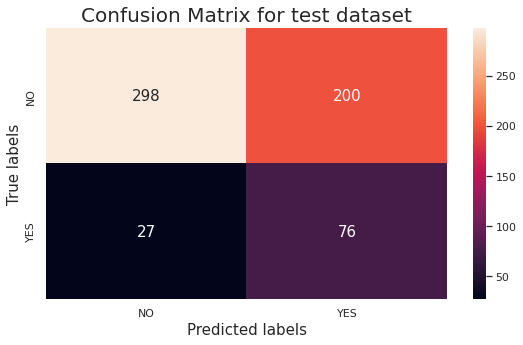

In [312]:
# Train naive bayes on tomeklink dataset
svc_tl = SVC(kernel='linear',class_weight='balanced', probability=True).fit(X_tl,y_tl)

# get confusion matrix for train data
get_confusion_matrix(svc_tl,X_test,y_test,'test')

In [313]:
# Get model performance using function I built, model_performance
individual_model_performance(svc_tl,X_tl,X_test,y_tl,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.400000                  0.401055
1   Accuracy                   0.661713                  0.622296
2     Recall                   0.730878                  0.737864
3  Precision                   0.275347                  0.275362
4   log_loss                  11.684246                 13.045694
5    roc_auc                   0.689987                  0.668129

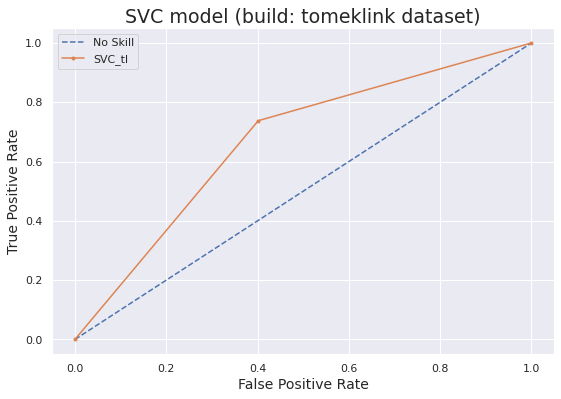

In [314]:
get_roc_curve(svc_tl, X_test,y_test,'SVC model (build: tomeklink dataset)','SVC_tl')

Results are more balanced. Close to 0.671804 but no improvement.

### Support vector machine model (Trained using smote dataset)

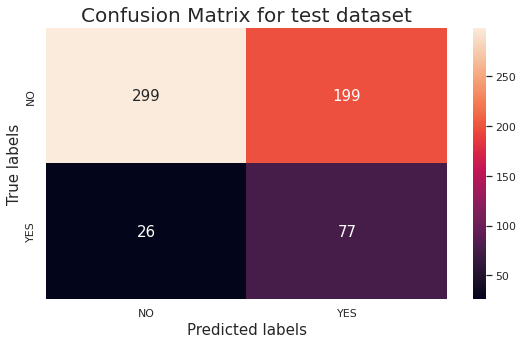

In [315]:
# Train naive bayes on tomeklink dataset
svc_sm = SVC(kernel='linear',class_weight='balanced', probability=True).fit(X_smote,y_smote)

# get confusion matrix for train data
get_confusion_matrix(svc_sm,X_test,y_test,'test')

In [316]:
# Get model performance using function I built, model_performance
individual_model_performance(svc_sm,X_smote,X_test,y_smote,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.704399                  0.406332
1   Accuracy                   0.690956                  0.625624
2     Recall                   0.736434                  0.747573
3  Precision                   0.675036                  0.278986
4   log_loss                  10.674141                 12.930755
5    roc_auc                   0.690956                  0.673987

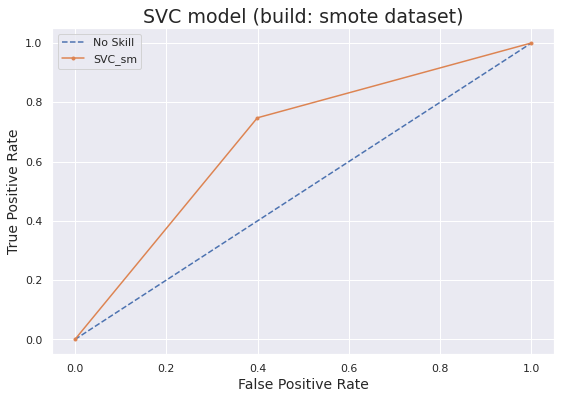

In [317]:
get_roc_curve(svc_sm, X_test,y_test,'SVC model (build: smote dataset)','SVC_sm')

No improvement over 0.671804.

## <u>Random Forest Classifier model

In [318]:
# Get a random randomforest model and check the score
rf_o = RandomForestClassifier(n_estimators=50,max_depth=3, class_weight='balanced')
rf_o.fit(X_train,y_train)

# Get model performance using function I built, model_performance
individual_model_performance(rf_o,X_train ,X_test, y_train,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.393914                  0.386707
1   Accuracy                   0.701374                  0.662230
2     Recall                   0.660057                  0.621359
3  Precision                   0.280723                  0.280702
4   log_loss                  10.314361                 11.666394
5    roc_auc                   0.684276                  0.646021

In [319]:
# Get a random randomforest model and check the score
rf_tl = RandomForestClassifier(n_estimators=90,max_depth=2, class_weight='balanced')
rf_tl.fit(X_tl,y_tl)
# Get model performance using function I built, model_performance
individual_model_performance(rf_tl,X_tl,X_test,y_tl,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.395480                  0.404558
1   Accuracy                   0.672640                  0.652246
2     Recall                   0.694051                  0.689320
3  Precision                   0.276524                  0.286290
4   log_loss                  11.306843                 12.011224
5    roc_auc                   0.681392                  0.666949

In [320]:
# Get a random randomforest model and check the score
rf_sm = RandomForestClassifier(n_estimators=50,max_depth=2,class_weight='balanced',random_state=0)
rf_sm.fit(X_smote,y_smote)
# Get model performance using function I built, model_performance
individual_model_performance(rf_sm,X_smote,X_test,y_smote,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.701780                  0.382749
1   Accuracy                   0.688372                  0.618968
2     Recall                   0.733333                  0.689320
3  Precision                   0.672831                  0.264925
4   log_loss                  10.763389                 13.160628
5    roc_auc                   0.688372                  0.646869

## <u>XGBClassifier model

In [321]:
# Get a XGBoost model and check the score
xgb_o = XGBClassifier(n_estimators=160,max_depth=5, class_weight='balanced')
xgb_o.fit(X_train,y_train)

# Get model performance 
individual_model_performance(xgb_o,X_train ,X_test, y_train,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.702206                  0.140625
1   Accuracy                   0.932528                  0.816972
2     Recall                   0.541076                  0.087379
3  Precision                   1.000000                  0.360000
4   log_loss                   2.330396                  6.321594
5    roc_auc                   0.770538                  0.527625

In [322]:
# Get a XGBoost model and check the score
xgb_tl = XGBClassifier(n_estimators=50,max_depth=6, class_weight='balanced')
xgb_tl.fit(X_tl,y_tl)

# Get model performance 
individual_model_performance(xgb_tl,X_train ,X_test, y_train,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.490566                  0.215385
1   Accuracy                   0.898792                  0.830283
2     Recall                   0.331445                  0.135922
3  Precision                   0.943548                  0.518519
4   log_loss                   3.495597                  5.861840
5    roc_auc                   0.664013                  0.554909

In [323]:
# Get a XGBoost model and check the score
xgb_sm = XGBClassifier(n_estimators=25,max_depth=1, class_weight='balanced')
xgb_sm.fit(X_smote,y_smote)

# Get model performance 
individual_model_performance(xgb_sm,X_train ,X_test, y_train,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.358939                  0.381443
1   Accuracy                   0.617659                  0.600666
2     Recall                   0.728045                  0.718447
3  Precision                   0.238184                  0.259649
4   log_loss                  13.205853                 13.792804
5    roc_auc                   0.663339                  0.647376

## <b><u>Model Comparison based on performance

###function format : models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test)

In [324]:
# Get the accuracy score for the model
def models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test):
  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix
  # Initialize the variables
  roc_auc , accuracy , precision , recall ,logloss , fscore = [],[],[],[],[],[]
  for model_name in model_list:
    # Get the predicted classes
    train_class_preds = model_name.predict(X_train)
    test_class_preds = model_name.predict(X_test)

    # Get train and test scores for that performance metric
    fscore.append((round(f1_score(y_train,train_class_preds),3) ,round(f1_score(y_test, test_class_preds),3)))
    accuracy.append((round(accuracy_score(y_train,train_class_preds),3),round(accuracy_score(y_test, test_class_preds),3)))
    recall.append((round(recall_score(y_train,train_class_preds),3), round(recall_score(y_test, test_class_preds),3)))
    precision.append((round(precision_score(y_train,train_class_preds),3), round(precision_score(y_test, test_class_preds),3)))
    logloss.append((round(log_loss(y_train,train_class_preds),3),round(log_loss(y_test, test_class_preds),3)))
    roc_auc.append((round(roc_auc_score(y_train,train_class_preds),3), round(roc_auc_score(y_test, test_class_preds),3)))

  # Prepare a metric dataframe
  model_comparison = pd.DataFrame(list(zip(model_name_list,roc_auc,accuracy,precision,recall,logloss,fscore)), columns = ['Model_Name','roc_auc_score','Accuracy_score','Precision_score','Recall_score','log_loss','f_score'])
  return model_comparison 

In [325]:
# fill the model list
model_list = [naive_o ,naive_tl ,naive_sm, lr_o ,lr_tl ,lr_sm, svc_o ,svc_tl ,svc_sm, rf_o ,rf_tl ,rf_sm, xgb_o ,xgb_tl ,xgb_sm]

# fill the model name list
model_name_list = ['naive_o' ,'naive_tl','naive_sm', 'lr_o' ,'lr_tl' ,'lr_sm', 'svc_o' ,'svc_tl' ,'svc_sm', 'rf_o' ,'rf_tl' ,'rf_sm', 'xgb_o' ,'xgb_tl' ,'xgb_sm']

In [326]:
# Get the performance of all the model in tabular format
performance_df = models_comparison(model_list, model_name_list, X_train, X_test, y_train, y_test)
performance_df

Model_Name   roc_auc_score  Accuracy_score Precision_score    Recall_score  \
0     naive_o  (0.612, 0.603)  (0.684, 0.661)  (0.235, 0.256)   (0.51, 0.515)   
1    naive_tl  (0.611, 0.602)  (0.683, 0.659)  (0.234, 0.255)   (0.51, 0.515)   
2    naive_sm  (0.611, 0.602)  (0.683, 0.659)  (0.234, 0.255)   (0.51, 0.515)   
3        lr_o   (0.68, 0.683)  (0.669, 0.659)  (0.263, 0.296)  (0.697, 0.718)   
4       lr_tl   (0.68, 0.676)  (0.666, 0.649)  (0.262, 0.289)    (0.7, 0.718)   
5       lr_sm  (0.675, 0.679)  (0.662, 0.652)  (0.258, 0.291)  (0.694, 0.718)   
6       svc_o  (0.685, 0.672)  (0.655, 0.629)   (0.26, 0.279)  (0.728, 0.738)   
7      svc_tl  (0.682, 0.668)  (0.647, 0.622)  (0.255, 0.275)  (0.731, 0.738)   
8      svc_sm  (0.682, 0.674)  (0.645, 0.626)  (0.254, 0.279)  (0.734, 0.748)   
9        rf_o  (0.684, 0.646)  (0.701, 0.662)  (0.281, 0.281)   (0.66, 0.621)   
10      rf_tl  (0.672, 0.667)  (0.657, 0.652)  (0.255, 0.286)  (0.694, 0.689)   
11      rf_sm   (0.66, 0.647)  (0.636, 0.619)  (0.242, 0.265)  (0.694, 0.689)   
12      xgb_o  (0.771, 0.528)  (0.933, 0.817)     (1.0, 0.36)  (0.541, 0.087)   
13     xgb_tl  (0.664, 0.555)   (0.899, 0.83)  (0.944, 0.519)  (0.331, 0.136)   
14     xgb_sm  (0.663, 0.647)  (0.618, 0.601)   (0.238, 0.26)  (0.728, 0.718)   

            log_loss         f_score  
0   (10.904, 11.724)  (0.322, 0.342)  
1   (10.947, 11.781)  (0.321, 0.341)  
2   (10.962, 11.781)  (0.321, 0.341)  
3   (11.436, 11.781)  (0.382, 0.419)  
4   (11.552, 12.126)  (0.381, 0.412)  
5   (11.667, 12.011)  (0.377, 0.415)  
6   (11.911, 12.816)  (0.383, 0.405)  
7   (12.199, 13.046)  (0.378, 0.401)  
8   (12.271, 12.931)  (0.378, 0.406)  
9   (10.314, 11.666)  (0.394, 0.387)  
10  (11.839, 12.011)  (0.373, 0.405)  
11  (12.573, 13.161)  (0.359, 0.383)  
12     (2.33, 6.322)  (0.702, 0.141)  
13    (3.496, 5.862)  (0.491, 0.215)  
14  (13.206, 13.793)  (0.359, 0.381)

## Hyperparameter fine tuned models

SVM and XGBoost are the model showing some promise to beat the test score of 0.68, but in order for them to perform best they need best hyper parameter values to maximize the performance. We will try to find those values using Bayes optimization cross validation.

### SVM model

In [327]:
start = time. time()

# Create an instance of the RandomForestClassifier
svm = SVC(kernel='linear',class_weight='balanced', probability=True,max_iter=2500)

# Bayes search
svm_bayes= BayesSearchCV(estimator=svm,
                       search_spaces = {'C': (0.00001,10),
                                    'gamma': (0.1,1)}, n_iter=10,
                       cv = 4, verbose=4, scoring='recall',random_state=0)
# Fit the train data
svm_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END C=5.309646339879824, gamma=0.7084715579892222;, score=0.685 total time=   0.5s
[CV 2/4] END C=5.309646339879824, gamma=0.7084715579892222;, score=0.625 total time=   0.4s
[CV 3/4] END C=5.309646339879824, gamma=0.7084715579892222;, score=0.739 total time=   0.4s
[CV 4/4] END C=5.309646339879824, gamma=0.7084715579892222;, score=0.727 total time=   0.4s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END C=2.583724036010862, gamma=0.9810132925837255;, score=0.708 total time=   0.4s
[CV 2/4] END C=2.583724036010862, gamma=0.9810132925837255;, score=0.614 total time=   0.4s
[CV 3/4] END C=2.583724036010862, gamma=0.9810132925837255;, score=0.739 total time=   0.4s
[CV 4/4] END C=2.583724036010862, gamma=0.9810132925837255;, score=0.727 total time=   0.4s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END C=5.286922133837088, gamma=0.15210805932417723;, score=0.685 total time=  

In [328]:
# Get the best estimator
svm_bayes.best_estimator_

SVC(C=2.3251479571623674, class_weight='balanced', gamma=0.3190023419215591,
    kernel='linear', max_iter=2500, probability=True)

In [329]:
# Create a optimal svc model
svc_bayes_optimal = svm_bayes.best_estimator_

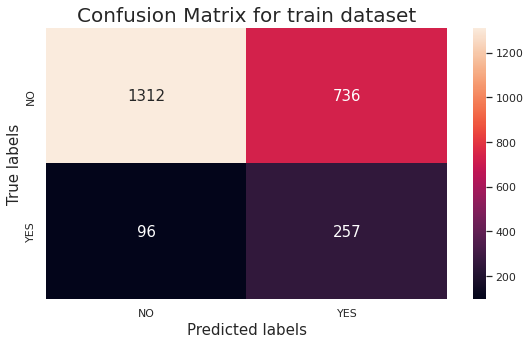

In [330]:
# Get confusion matrix for train data
get_confusion_matrix(svc_bayes_optimal,X_train,y_train,'train')

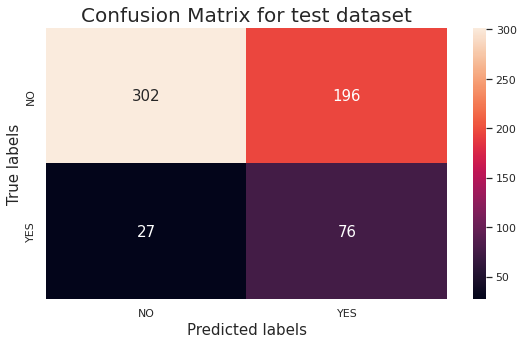

In [331]:
# Get confusion matrix for test data
get_confusion_matrix(svc_bayes_optimal,X_test,y_test,'test')

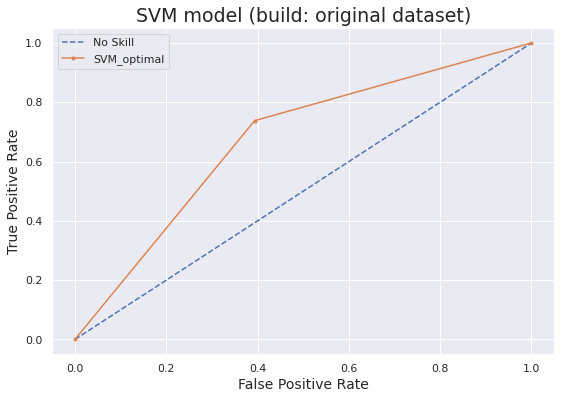

In [332]:
# Get roc_auc curve fo optimized SVM moddel
get_roc_curve(svc_bayes_optimal, X_test,y_test,'SVM model (build: original dataset)','SVM_optimal')

In [333]:
# Get model performance using function I built, model_performance
individual_model_performance(svc_bayes_optimal,X_tl,X_test,y_tl,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.403137                  0.405333
1   Accuracy                   0.667395                  0.628952
2     Recall                   0.728045                  0.737864
3  Precision                   0.278742                  0.279412
4   log_loss                  11.487999                 12.815813
5    roc_auc                   0.692188                  0.672145

In [334]:
from sklearn.metrics import classification_report

# Print the classification report for train and test
print(classification_report(y_train, svc_bayes_optimal.predict(X_train)))
print("\n")
print(classification_report(y_test, svc_bayes_optimal.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76      2048
           1       0.26      0.73      0.38       353

    accuracy                           0.65      2401
   macro avg       0.60      0.68      0.57      2401
weighted avg       0.83      0.65      0.70      2401



              precision    recall  f1-score   support

           0       0.92      0.61      0.73       498
           1       0.28      0.74      0.41       103

    accuracy                           0.63       601
   macro avg       0.60      0.67      0.57       601
weighted avg       0.81      0.63      0.67       601



###XGB classifier

In [335]:
start = time. time()

# Create an instance of the XGBoostClassifier
xgb_model = XGBClassifier(max_depth=1, class_weight='balanced',random_state=0)

# Grid search
xgb_bayes= BayesSearchCV(estimator=xgb_model,
                       search_spaces = {'n_estimators':(10,170),
                                    'min_samples_weight': (0.9,1),
                                    'reg_alpha':(0.0000001,10), 'gamma':(0.1,1)}, n_iter=20,
                       cv = 10, verbose=4, scoring='recall',random_state=0)
# Fit the data
xgb_bayes.fit(X_smote,y_smote)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END gamma=0.5778677484569327, min_samples_weight=0.9676079508876914, n_estimators=110, reg_alpha=6.4667994460485785;, score=0.653 total time=   0.1s
[CV 2/10] END gamma=0.5778677484569327, min_samples_weight=0.9676079508876914, n_estimators=110, reg_alpha=6.4667994460485785;, score=0.720 total time=   0.1s
[CV 3/10] END gamma=0.5778677484569327, min_samples_weight=0.9676079508876914, n_estimators=110, reg_alpha=6.4667994460485785;, score=0.762 total time=   0.1s
[CV 4/10] END gamma=0.5778677484569327, min_samples_weight=0.9676079508876914, n_estimators=110, reg_alpha=6.4667994460485785;, score=0.767 total time=   0.1s
[CV 5/10] END gamma=0.5778677484569327, min_samples_weight=0.9676079508876914, n_estimators=110, reg_alpha=6.4667994460485785;, score=0.746 total time=   0.1s
[CV 6/10] END gamma=0.5778677484569327, min_samples_weight=0.9676079508876914, n_estimators=110, reg_alpha=6.4667994460485785;, score=0.753 tota

In [336]:
# Get best estimators from the cross validation results
xgb_bayes.best_estimator_

XGBClassifier(class_weight='balanced', gamma=0.3092626254072385, max_depth=1,
              min_samples_weight=0.92433359354684, n_estimators=127,
              reg_alpha=2.8553755655614887)

In [337]:
# Create a optmial XGBoost model
xgb_bayes_optimal = xgb_bayes.best_estimator_

In [338]:
# Get the score on both train and test data
xgb_bayes_optimal.score(X_train,y_train), xgb_bayes_optimal.score(X_test,y_test)

(0.6643065389421074, 0.6472545757071547)

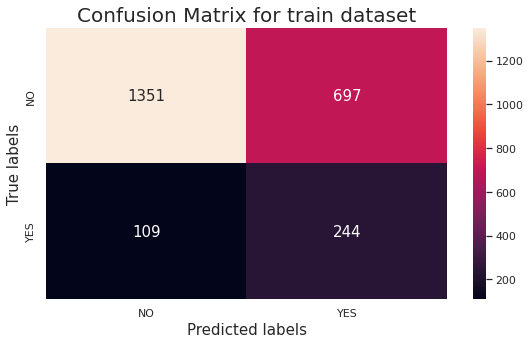

In [339]:
# Get confusion matrix for train data
get_confusion_matrix(xgb_bayes_optimal,X_train,y_train,'train')

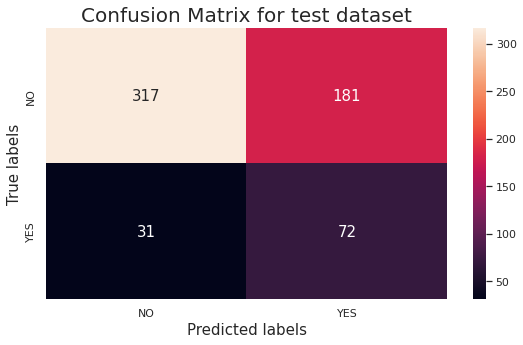

In [340]:
# Get confusion matrix for test data
get_confusion_matrix(xgb_bayes_optimal,X_test,y_test,'test')

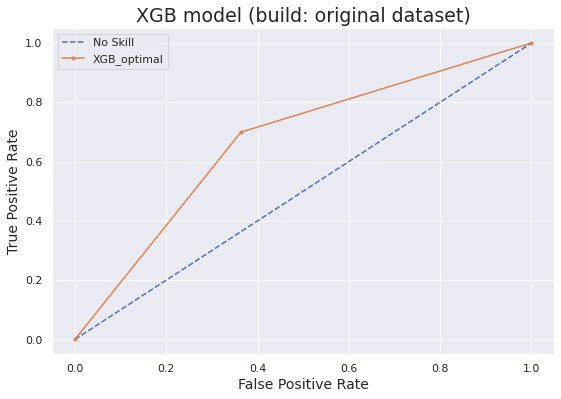

In [341]:
# Get roc_curve for optmized XGBoost model
get_roc_curve(xgb_bayes_optimal, X_test,y_test,'XGB model (build: original dataset)','XGB_optimal')

In [342]:
# Get the model performance
individual_model_performance(xgb_bayes_optimal, X_train, X_test, y_train, y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.377125                  0.404494
1   Accuracy                   0.664307                  0.647255
2     Recall                   0.691218                  0.699029
3  Precision                   0.259299                  0.284585
4   log_loss                  11.594674                 12.183636
5    roc_auc                   0.675443                  0.667788

## Best Model out of 15 models

Results are so close, we will use cross validation score to select the best model.

In [343]:
# Import the libraries
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

cv_scores=[]
model_name_list = ['naive_o' ,'naive_tl','naive_sm', 'lr_o' ,'lr_tl' ,'lr_sm', 'svc_bayes_optimal' ,'svc_tl' ,'svc_sm', 'rf_o' ,'rf_tl' ,'rf_sm', 'xgb_o' ,'xgb_tl' ,'xgb_bayes_optimal']
model_list = [naive_o ,naive_tl ,naive_sm, lr_o ,lr_tl ,lr_sm, svc_bayes_optimal ,svc_tl ,svc_sm, rf_o ,rf_tl ,rf_sm, xgb_o ,xgb_tl ,xgb_bayes_optimal]
for num in range(len(model_list)):
  # evaluate model
  scores = cross_val_score(model_list[num], X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
  # summarize performance
  print('Mean ROC AUC: %.4f' % mean(scores)+f', for {model_name_list[num]}')
  cv_scores.append(round(mean(scores),4))

print("  ")
# Get best model
print('--'*10)
best_score=max(cv_scores)
print('The best model is {}'.format(model_name_list[cv_scores.index(best_score)]))
print('--'*10)

Mean ROC AUC: 0.6136, for naive_o
Mean ROC AUC: 0.6136, for naive_tl
Mean ROC AUC: 0.6136, for naive_sm
Mean ROC AUC: 0.7192, for lr_o
Mean ROC AUC: 0.7192, for lr_tl
Mean ROC AUC: 0.7192, for lr_sm
Mean ROC AUC: 0.7141, for svc_bayes_optimal
Mean ROC AUC: 0.7138, for svc_tl
Mean ROC AUC: 0.7138, for svc_sm
Mean ROC AUC: 0.6943, for rf_o
Mean ROC AUC: 0.6920, for rf_tl
Mean ROC AUC: 0.6902, for rf_sm
Mean ROC AUC: 0.6526, for xgb_o
Mean ROC AUC: 0.6725, for xgb_tl
Mean ROC AUC: 0.7028, for xgb_bayes_optimal
  
--------------------
The best model is lr_o
--------------------


In [344]:
# Create the test roc_auc_score column in performance_df
performance_df['test roc_auc score'] = performance_df['roc_auc_score'].apply(lambda x: x[1])

Text(0.5, 1.0, 'Comparison of classification Models')

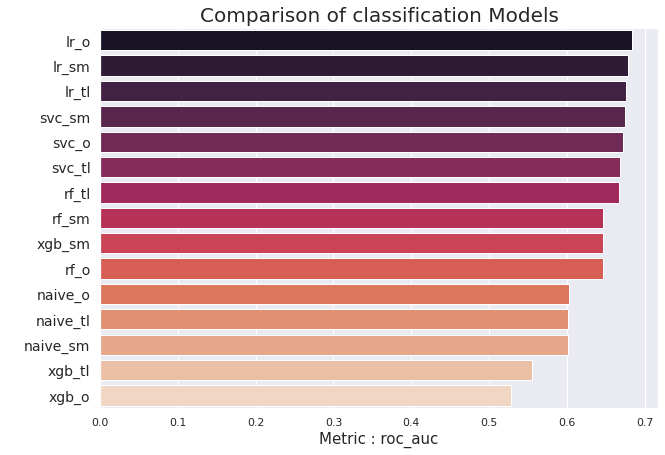

In [348]:
# Configuration for the plot
plt.figure(figsize=(10,7))
# Get Test roc_auc score comparison plot for various models
sns.barplot(y='Model_Name', x='test roc_auc score', data=performance_df.sort_values('test roc_auc score',ascending=False), palette='rocket')
plt.yticks(fontsize=14)
plt.ylabel(" ")
plt.xlabel("Metric : roc_auc",fontsize=15)
plt.title('Comparison of classification Models', fontsize=20)

# <b><u>Explaining Logistic Regression Model </b></u>
From the performance comparison of 15 models , we found out that Logistic Regression model is performing the best with CV roc_auc mean score of 0.7192. 

Let's check out some of the stats of this model...

In [349]:
# Import classification report
from sklearn.metrics import classification_report

# Print the classification report for train and test
print(classification_report(y_train, lr_o.predict(X_train)))
print("\n")
print(classification_report(y_test, lr_o.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      2048
           1       0.26      0.70      0.38       353

    accuracy                           0.67      2401
   macro avg       0.60      0.68      0.58      2401
weighted avg       0.83      0.67      0.72      2401



              precision    recall  f1-score   support

           0       0.92      0.65      0.76       498
           1       0.30      0.72      0.42       103

    accuracy                           0.66       601
   macro avg       0.61      0.68      0.59       601
weighted avg       0.81      0.66      0.70       601



(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

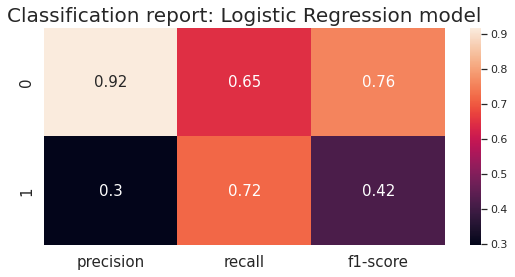

In [362]:
# Get the heatmap to show the performance for both the classes.
plt.figure(figsize=(9,4))
sns.heatmap(pd.DataFrame(classification_report(y_test, 
                                               lr_o.predict(X_test), 
                                               target_names=[0,1],
                                               output_dict=True)).iloc[:-1, :-3].T, annot=True, annot_kws={"fontsize":15})
plt.title('Classification report: Logistic Regression model',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

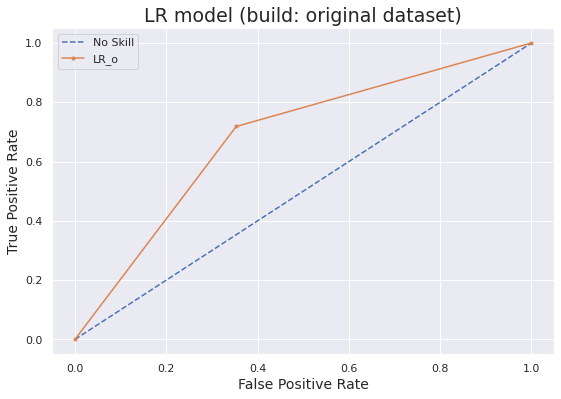

In [351]:
get_roc_curve(lr_o, X_test,y_test,'LR model (build: original dataset)','LR_o')

In [352]:
# Get the roc_auc_score
roc_auc_score(y_test,lr_o.predict(X_test))

0.6825164736616369

In [353]:
# View the coefficient values
def feature_coefficients(model_name,X,label):
  labels = X.columns
  coef = pd.DataFrame(list(zip(labels,model_name.coef_[0])),columns=['Features','Coef'])
  coef['Absolute coef'] = abs(coef['Coef'])
  coef.sort_values('Coef',ascending=False,inplace=True)
  coef.reset_index(drop=True,inplace=True)
  # Plot the feature importance plot using feature coefficients datframe
  
  plt.figure(figsize=(7,7))
  sns.barplot(x='Coef',y='Features',data=coef)
  plt.xlabel('Coefficients',fontsize=14)
  plt.yticks(fontsize=14)
  plt.ylabel('',fontsize=14)
  plt.title('Feature importance, (Model: {})'.format(label),fontsize=20)

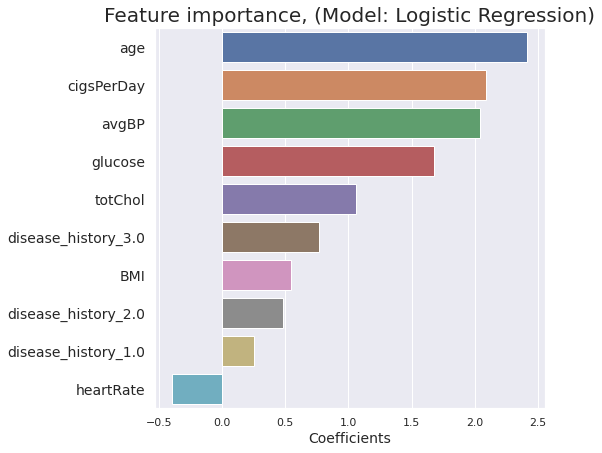

In [354]:
# Get feature coefficients
feature_coefficients(lr_o,X_test,'Logistic Regression')

Inferences:

* Except heartrate all other features are positively correlated with the dependent variable, i.e. as the feature value increases the person is more prone to cardiovascular risk.
* age is the most prominent feature for cardiovascular diseases. But, age is not controllable.
* Next 3 important features are cigarettes per day, blood pressure and glucose level. So it is highly recommended not to smoke. 

# <b><u>Project Summary

Yay! We have completed the project and the journey had been full of learning. Summarizing what we have achieved so far in this project, 
## 1. Data exploration
 * Starting from loading dataset, we got the first look at our dataset. We quickly dropped features like 'id' and 'education' which were irrelevent to the analysis. Also, we had two features in textual format, so we transformed them into the numerical format. 
 * We viewed statistics of the data and found that there are no duplicate rows, no mismatched rows, however, we do have missing values in the dataset. We calculated the % of missing content and find that ~9% of data is missing. For this project we decided to drop the missing rows.

> ### a. Data Visualization
> * There is an imbalance between the classes, class 1 has only 15.1% of the data. 
> ![](https://drive.google.com/uc?export=view&id=1tftje2A2vDQGsqXRHg01l5E98GQFyUS8)
* Information on independent variables, features like 'age' and 'sysBP' showed class separation boundaries. While other numerical features had overlapping classes. 

>![](https://drive.google.com/uc?export=view&id=1JT-wa8NnHCoz_n_gMwt88K0XzS6ULkTP)
* 'totChol' had few outliers which were inconsistent with the data, so we dropped those rows.
* Plotting Pearson - correlation matrix we found out that there is a strong relationship between 'sysBP' and 'diaBP'.

## 2. Feature engineering
* We combined sysBP and diaBP to get avgBP.
* We combined all of the history features namely BPMeds, prevalentHyp, prevalentStroke and diabetes to get disease_history.


##3.  Feature selection
* Using Boruta, a feature selection method, we picked 'age','cigsPerDay' 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' only these 8 features came out to be on top from the original dataset.
* 'avgBP' was selected over sysBP and diaBP and 'disease_history' was also selected since it has comparably strong correlation with the dependent variable.* Categories in disease_history was formed as separate dummy variables.
> ![](https://drive.google.com/uc?export=view&id=1TcG5E8ilrJWrmf8hPbDifsJe6kF6XIxE)

##4. Creating train and test dataset
* We have created three datasets, 
> X_train using train test split, X_tl using undersampling technique tomeklinks over X_train and X_smote using oversampling technique SMOTE. 

> ![](https://drive.google.com/uc?export=view&id=1CNSqTeXG5OoaRU9AiLPYB9QFxVZQVKP8)

##5. Build various ML models
* Built naive bayes, logistic regression, support vector machine, random forest and XGBoost model using the 3 train datasets.
* Finding optimal hyperparameters for support vector machine and XGBoost using BayesSearchCV.
* On comparing all the models Logistic regression model built on top of original dataset gave best performance.

> ![](https://drive.google.com/uc?export=view&id=1MOnGnBqny0Tu0kPDFUUjDgowvFEQGkLD)

##6. Explaining the logistic regression model properties and performance statistics
* We found out that Logistic Regression model is performing the best with minimum roc_auc score of 0.68, accuracy of 0.66, recall of 0.69 and precision of 0.263. 

> ![](https://drive.google.com/uc?export=view&id=1y1qwgdClNQ9WGeyfKsyTunTkufOjNnDH)
* Features that are helpful in predicting the class in decreasing order of their importance are, 
> ![](https://drive.google.com/uc?export=view&id=1imf6QjXBMpcyKFFEXNE-JvKQVhOGoOqS)